# Final Analysis and Insights
## Objective
- This notebook focuses on consolidating our findings, visualizing final insights, and providing overall SEO recommendations based on the data collected and analyzed from Baldur's Gate 3 guides.
## Workflow
1. Load processed data
2. Visualizing Word Clouds for unigrams for all text fields
3. Key insights with specific visualizations
4. Google questions-specific analysis
5. SEO recommendations

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

## Load Data

In [2]:
data_filepath = "data/fully_processed_data.pkl"
final_data = pd.read_pickle(data_filepath)

## Word Clouds for Content and Meta Data
Generate word clouds for content, meta titles, and descriptions to visualize prominent words.

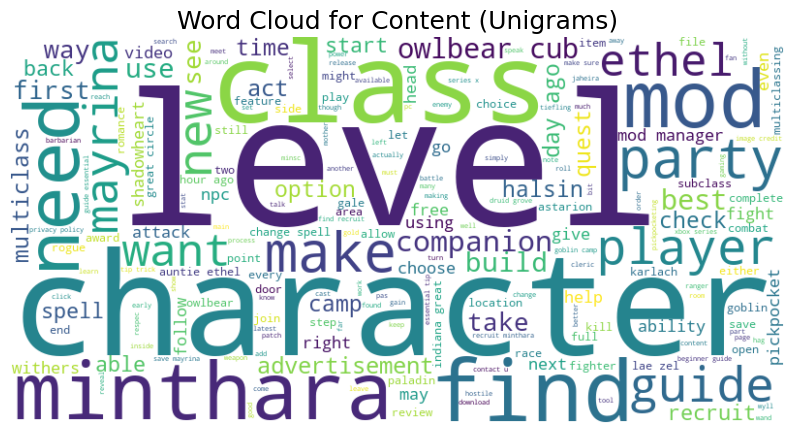

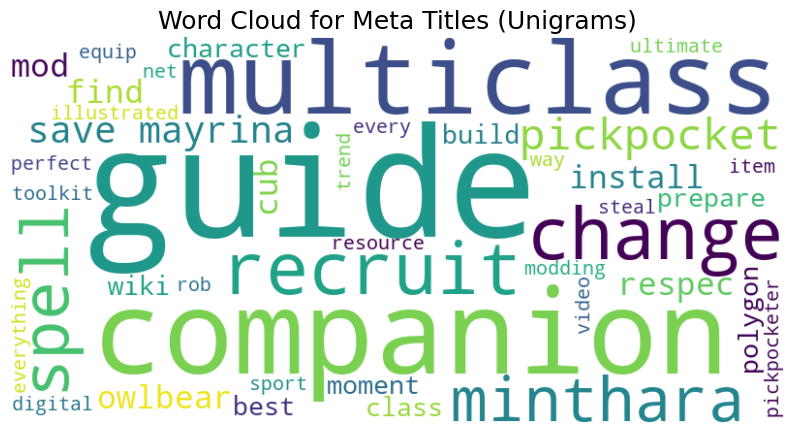

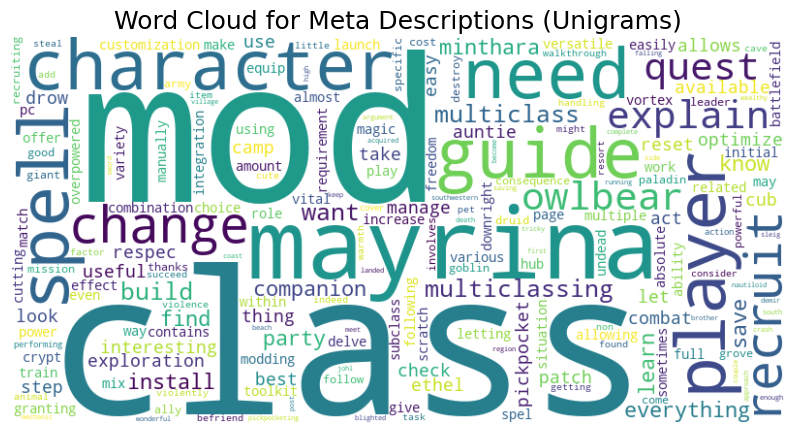

In [3]:
def generate_wordcloud(column, title):
    all_words = " ".join([" ".join(row) for row in final_data[column].dropna()])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=18)
    plt.show()

generate_wordcloud("Unigrams_Content", "Word Cloud for Content (Unigrams)")
generate_wordcloud("Unigrams_Meta_Title", "Word Cloud for Meta Titles (Unigrams)")
generate_wordcloud("Unigrams_Meta_Description", "Word Cloud for Meta Descriptions (Unigrams)")

## Key Insights and Specific Visualizations
### Insight 1: Focus of Content Trigrams
Highlight that content trigrams reveal the guides often include references to other games, events, or links relevant to the gaming industry.

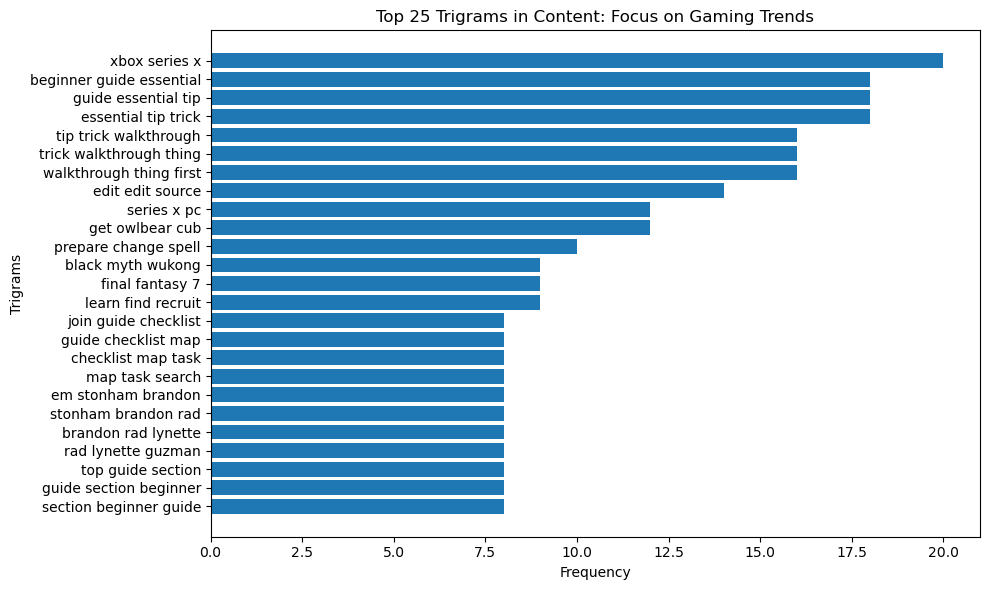

In [4]:
content_trigrams = Counter([word for row in final_data["Trigrams_Content"] for word in row])
top_trigrams = content_trigrams.most_common(25)

plt.figure(figsize=(10, 6))
plt.barh([trigram[0] for trigram in reversed(top_trigrams)], 
         [trigram[1] for trigram in reversed(top_trigrams)])
plt.title("Top 25 Trigrams in Content: Focus on Gaming Trends")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.tight_layout()
plt.show()

The trigrams in the guide content highlight a strong emphasis on linking to other popular games, consoles, or events, such as "Xbox Series X," "Black Myth: Wukong," "Final Fantasy 7," and "Game Awards." This suggests an intentional effort to engage readers with trending gaming topics, thereby enhancing SEO performance and driving additional page views. Additionally, phrases like "guide essential tip," "tip trick walkthrough," and "checklist map task" indicate the presence of broken or generic expressions related to guides, walkthroughs, and tips. While these phrases contribute to content structure, they lack clarity and are unlikely to serve as actionable trigrams for future SEO optimization.

### Insight 2: Overlap Between Content and Google Questions
This chart highlights the relevance of guides to specific Google search questions by showing frequent terms in content unigrams.

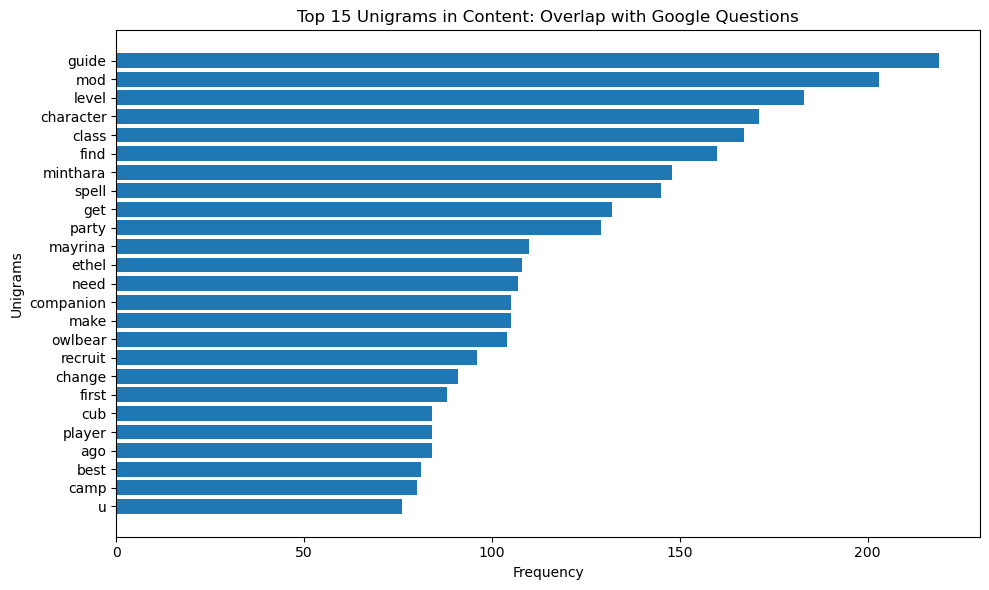

In [5]:
content_unigrams = Counter([word for row in final_data["Unigrams_Content"] for word in row])
top_unigrams = content_unigrams.most_common(25)

plt.figure(figsize=(10, 6))
plt.barh([unigram[0] for unigram in reversed(top_unigrams)], 
         [unigram[1] for unigram in reversed(top_unigrams)])
plt.title("Top 15 Unigrams in Content: Overlap with Google Questions")
plt.xlabel("Frequency")
plt.ylabel("Unigrams")
plt.tight_layout()
plt.show()

The most common unigrams include words directly related to search queries, such as "install," "change," "recruit," and "spells." This indicates that the content successfully targets user questions.

## Google Questions-Specific Analysis
Analyze the top unigrams, bigrams, and trigrams for content, meta titles, and meta descriptions across the 9 Google questions.

In [6]:
def plot_ngrams_for_section(data, question_name, section_name, unigram_col, bigram_col, trigram_col):
    subset = data[data['Google_Question'] == question_name]
    
    unigrams = Counter([word for row in subset[unigram_col] for word in row])
    bigrams = Counter([word for row in subset[bigram_col] for word in row])
    trigrams = Counter([word for row in subset[trigram_col] for word in row])

    top_unigrams = unigrams.most_common(10)
    top_bigrams = bigrams.most_common(10)
    top_trigrams = trigrams.most_common(10)

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    axes[0].barh([word[0] for word in reversed(top_unigrams)], [word[1] for word in reversed(top_unigrams)])
    axes[0].set_title(f"Top 10 Unigrams - {section_name}", fontsize=14)
    axes[0].set_xlabel("Frequency", fontsize=12)
    axes[0].set_ylabel("Words", fontsize=12)

    axes[1].barh([word[0] for word in reversed(top_bigrams)], [word[1] for word in reversed(top_bigrams)])
    axes[1].set_title(f"Top 10 Bigrams - {section_name}", fontsize=14)
    axes[1].set_xlabel("Frequency", fontsize=12)
    axes[1].set_ylabel("Phrases", fontsize=12)

    axes[2].barh([word[0] for word in reversed(top_trigrams)], [word[1] for word in reversed(top_trigrams)])
    axes[2].set_title(f"Top 10 Trigrams - {section_name}", fontsize=14)
    axes[2].set_xlabel("Frequency", fontsize=12)
    axes[2].set_ylabel("Phrases", fontsize=12)

    plt.tight_layout()
    plt.show()

def plot_question_ngrams(data, question_name):
    print(f"Question:{question_name}")
    print("Content:")
    plot_ngrams_for_section(data, question_name, "Content", 
                            "Unigrams_Content", "Bigrams_Content", "Trigrams_Content")
    print("Meta Title:")
    plot_ngrams_for_section(data, question_name, "Meta Title", 
                            "Unigrams_Meta_Title", "Bigrams_Meta_Title", "Trigrams_Meta_Title")
    print("Meta Description:")
    plot_ngrams_for_section(data, question_name, "Meta Description", 
                            "Unigrams_Meta_Description", "Bigrams_Meta_Description", "Trigrams_Meta_Description")

In [7]:
unique_questions = final_data['Google_Question'].unique()

## Question 1: How to MultiClass?

### Content, meta titles, and descriptions focus heavily on "multiclass" and "level," with phrases like "best multiclass build" aligning perfectly with user intent for optimization strategies.

Question:How to multiclass?
Content:


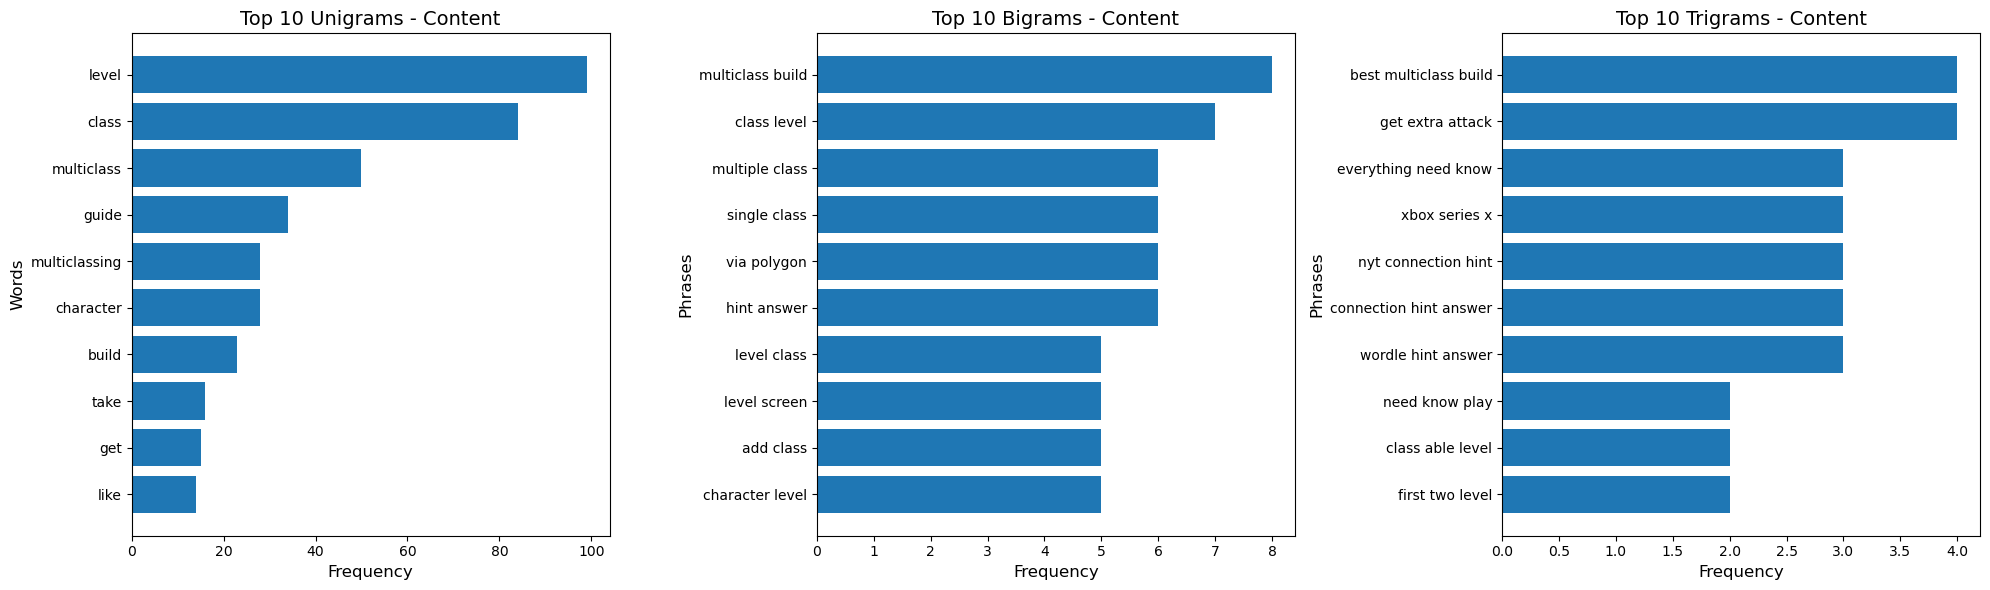

Meta Title:


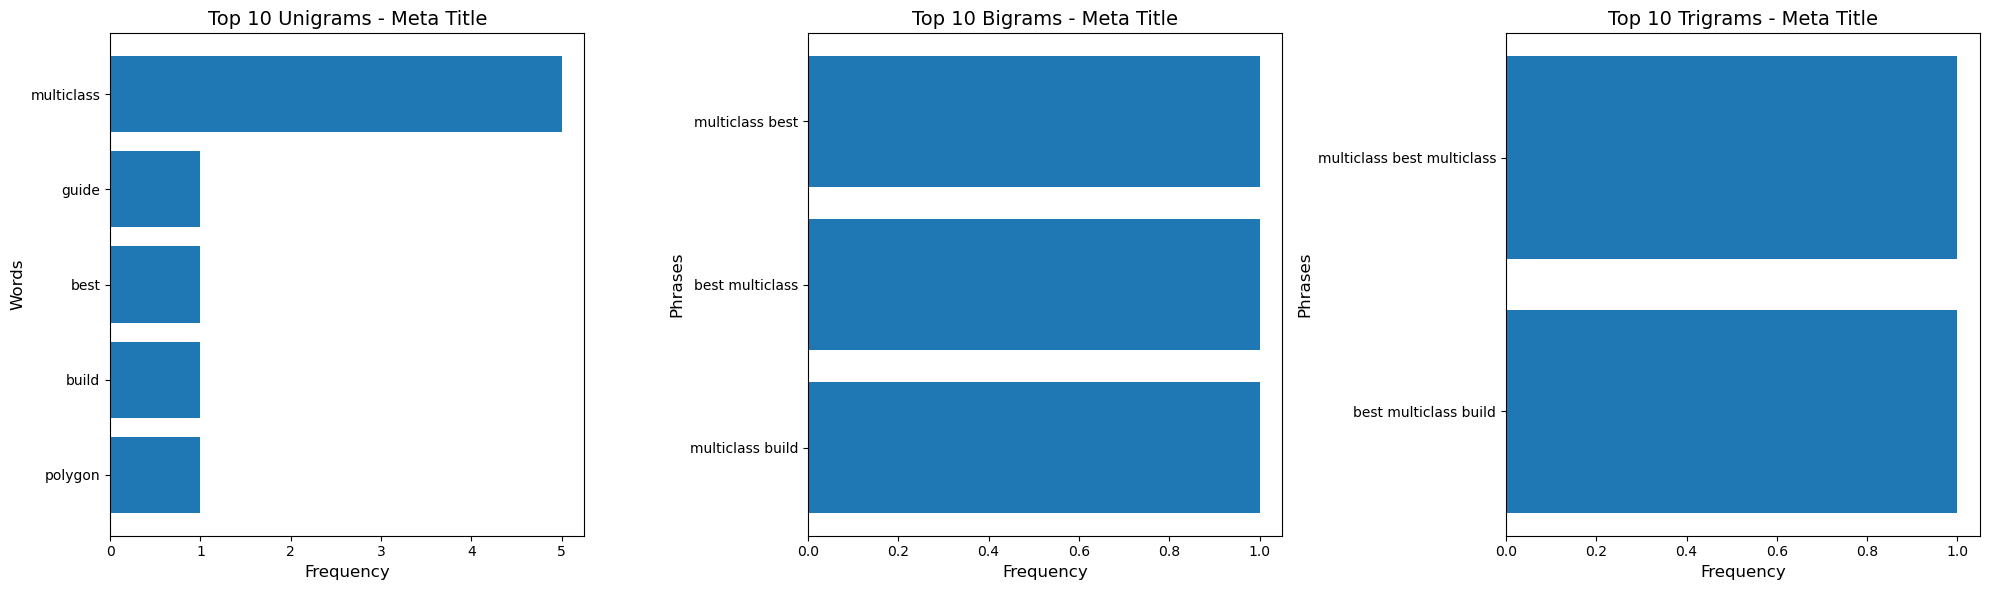

Meta Description:


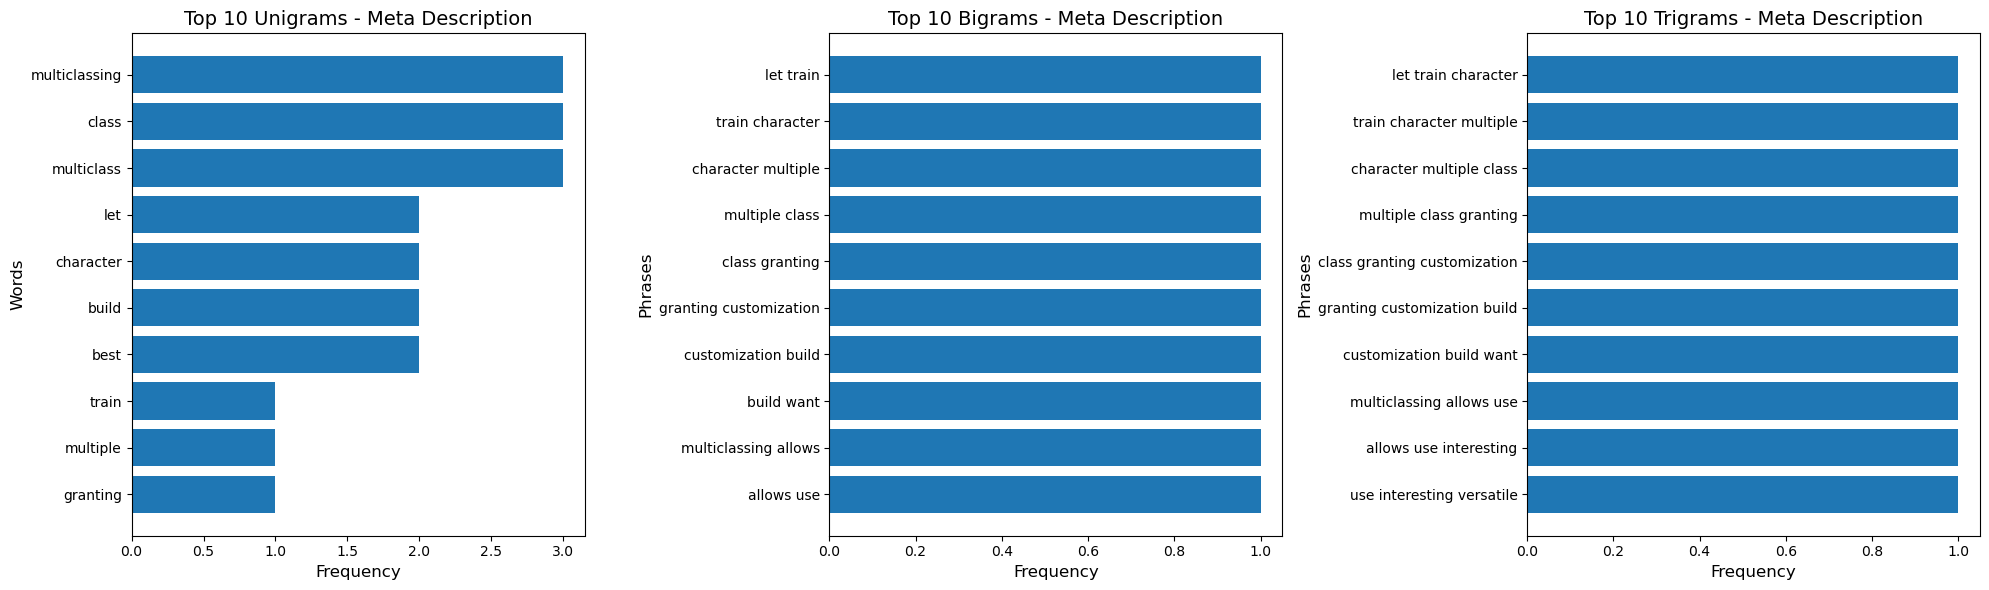

In [8]:
plot_question_ngrams(final_data, unique_questions[0])

## Question 2: How to Install Mods?

### The content emphasizes practical steps and tools like "mod manager" and "install mod," while descriptions highlight broader support resources and troubleshooting.

Question:How to install mods?
Content:


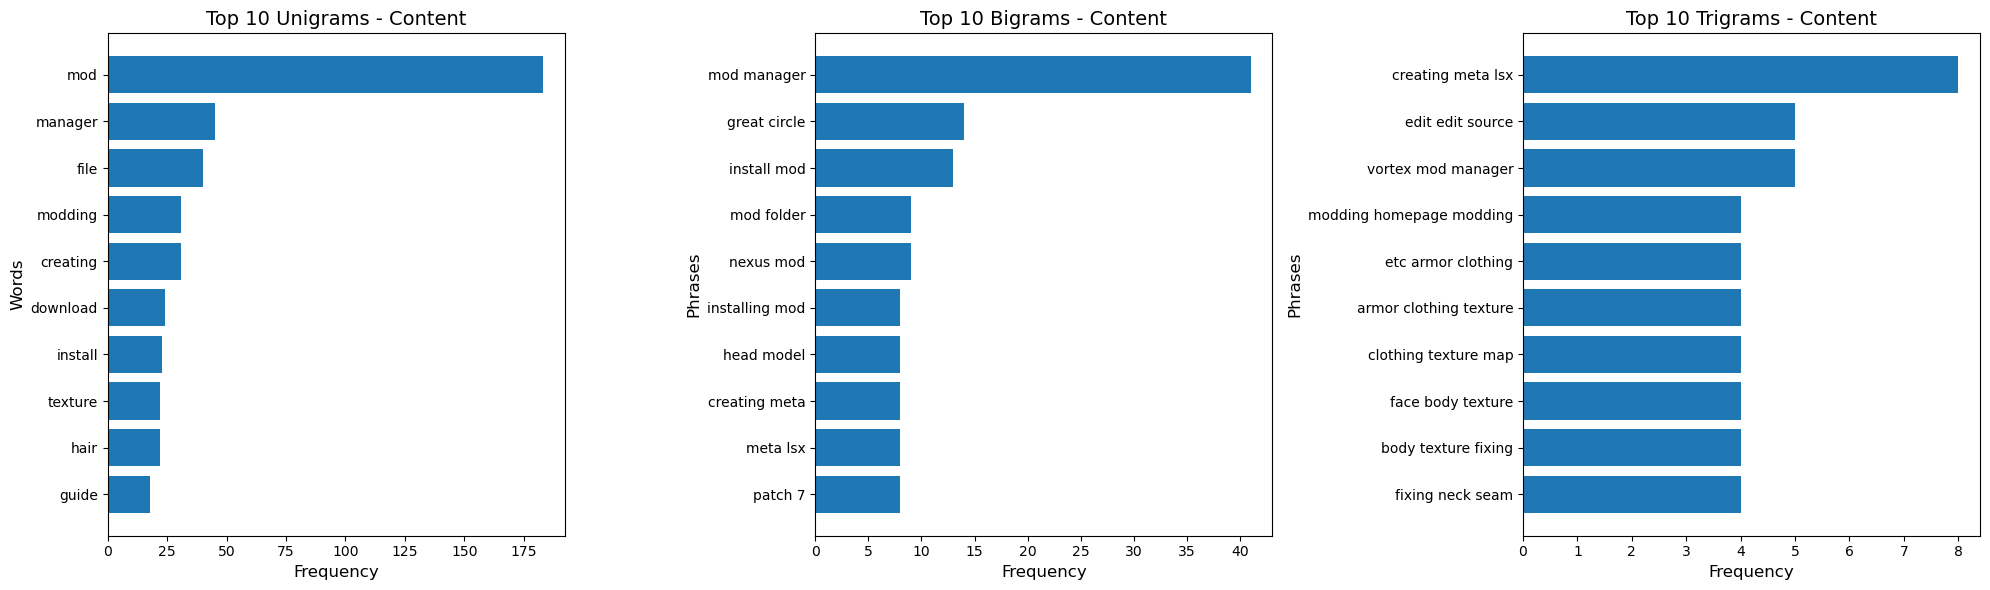

Meta Title:


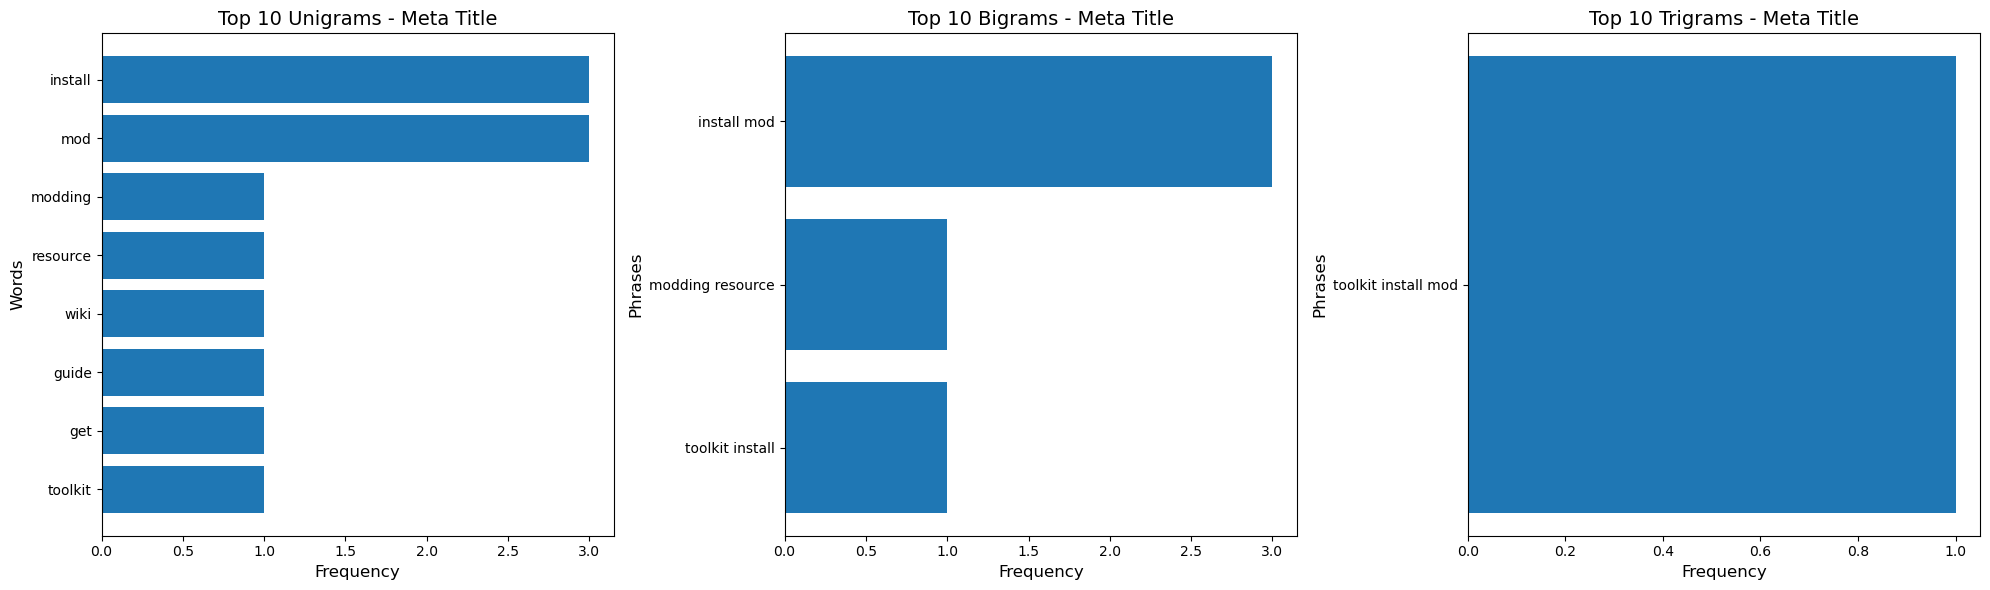

Meta Description:


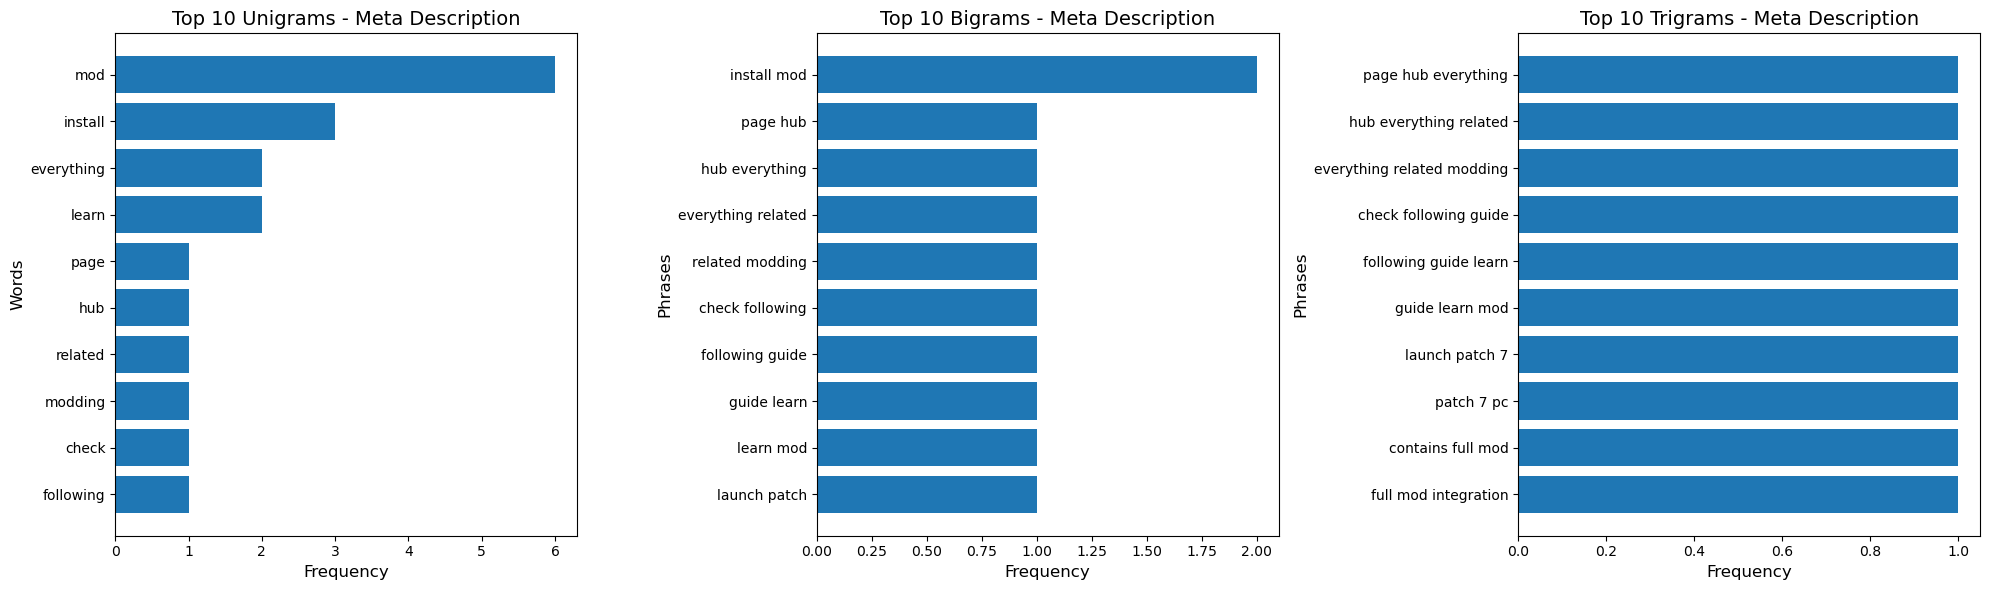

In [9]:
plot_question_ngrams(final_data, unique_questions[1])

## Question 3: How to Change Spells?

### Strong alignment between query terms like "change spells" and high-frequency phrases such as "prepare spell" and "optimize party" reflect a focus on mechanics and usability.

Question:How to change spells?
Content:


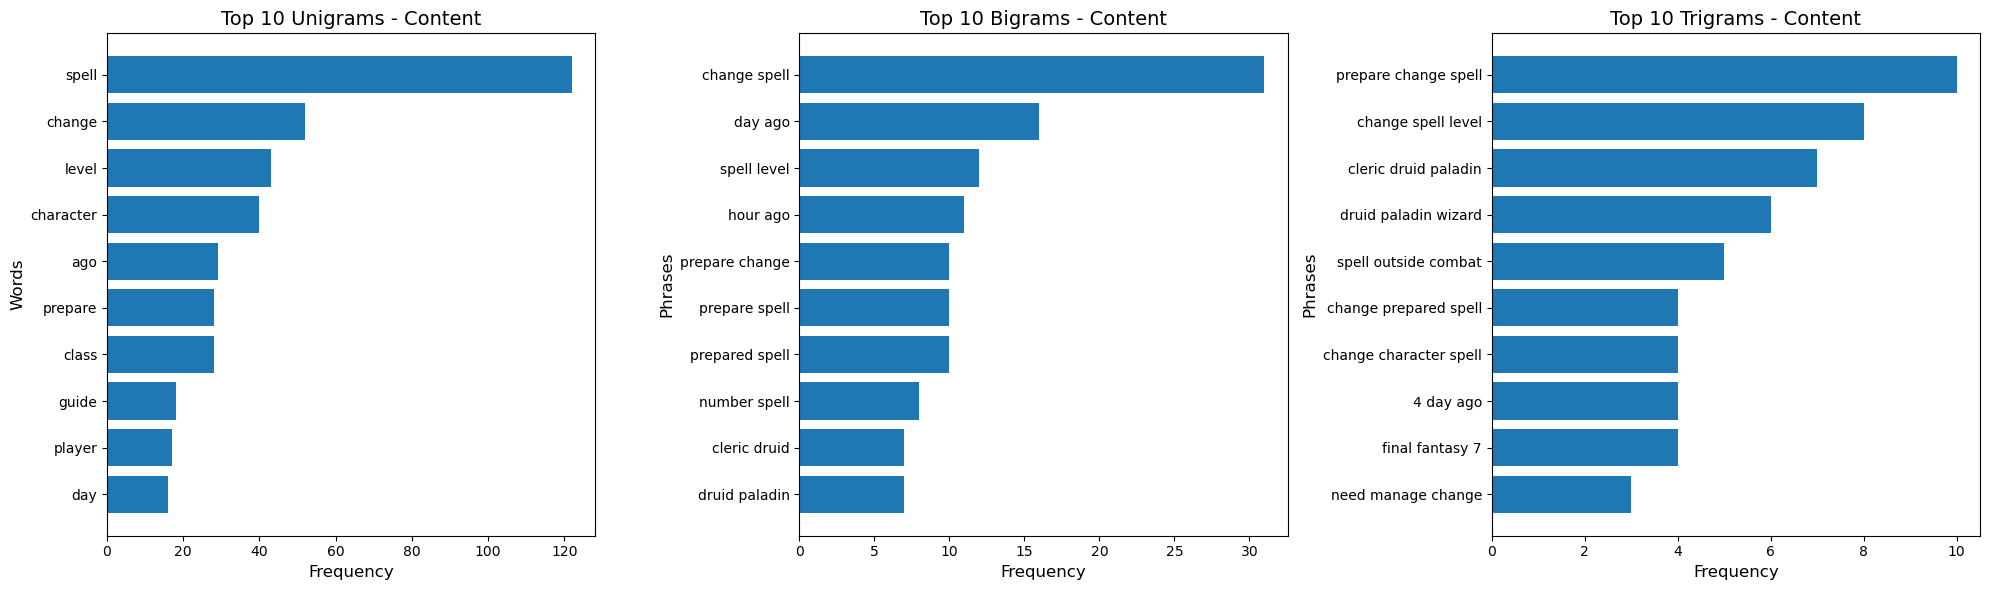

Meta Title:


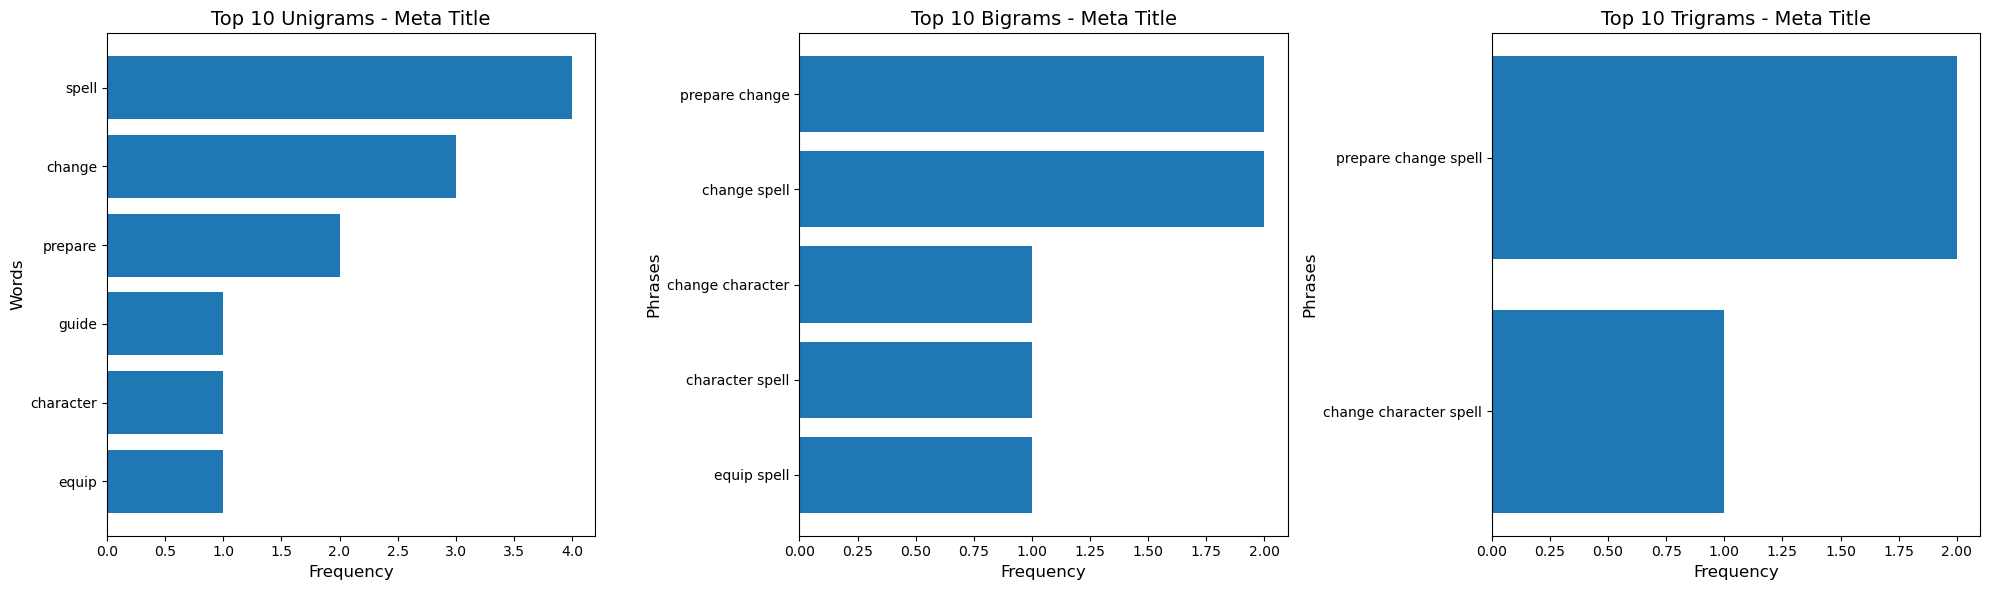

Meta Description:


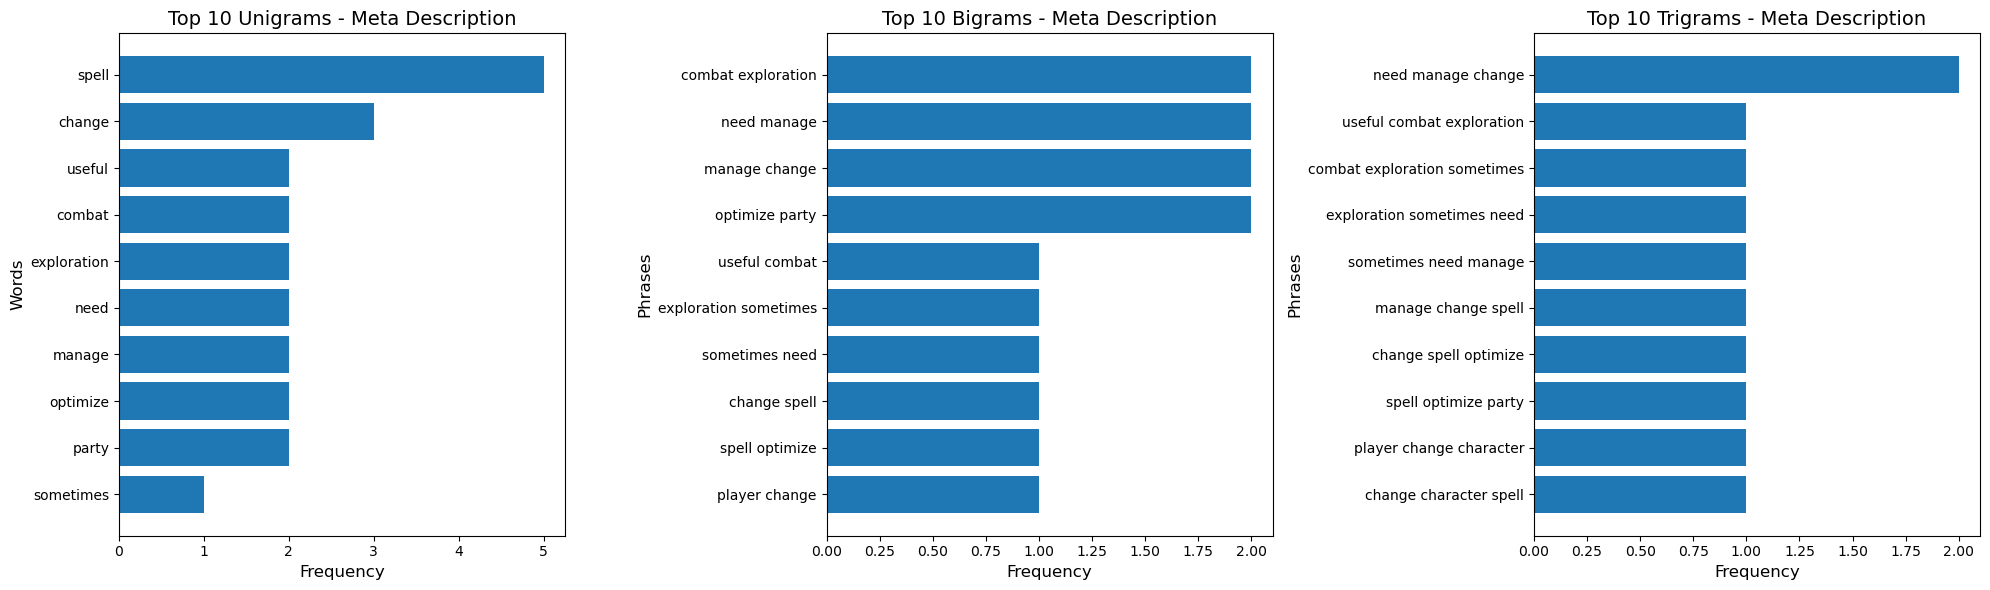

In [10]:
plot_question_ngrams(final_data, unique_questions[2])

## Question 4: How to Respec?

### Keywords like "respec," "class," and "character" dominate all sections, with clear actionable steps such as "respec change class" and "reset character options."

Question:How to respec?
Content:


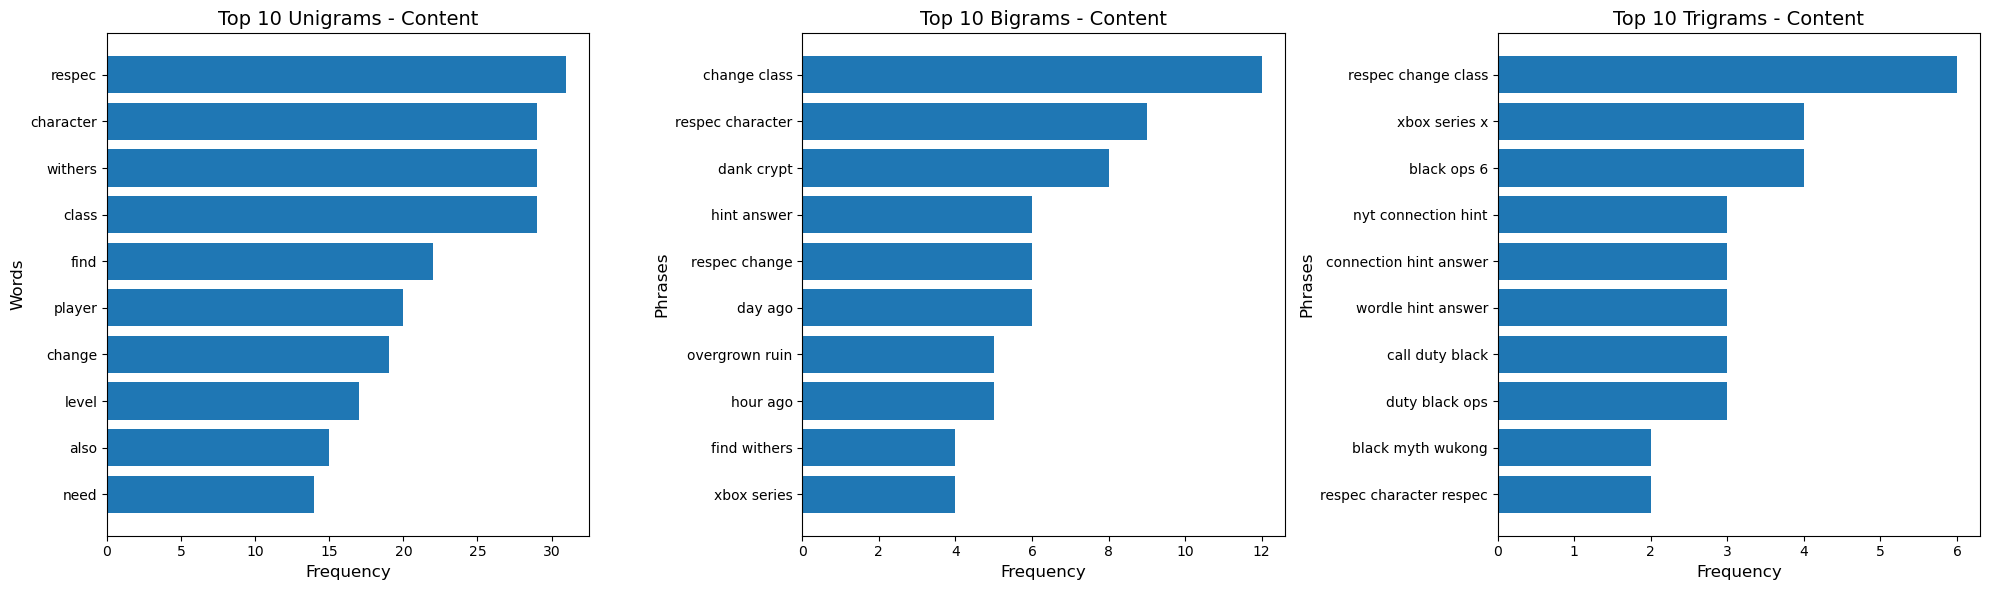

Meta Title:


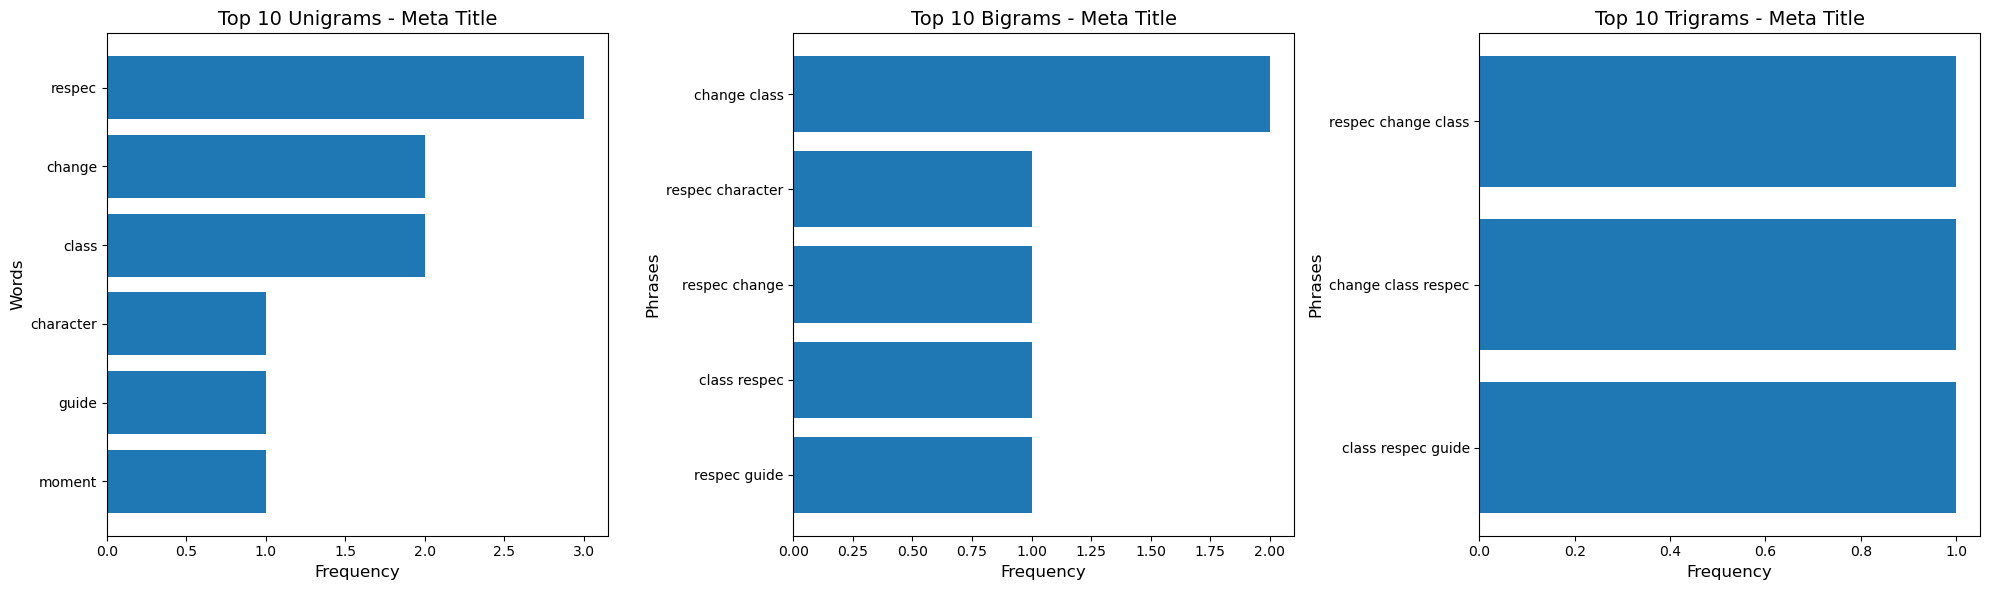

Meta Description:


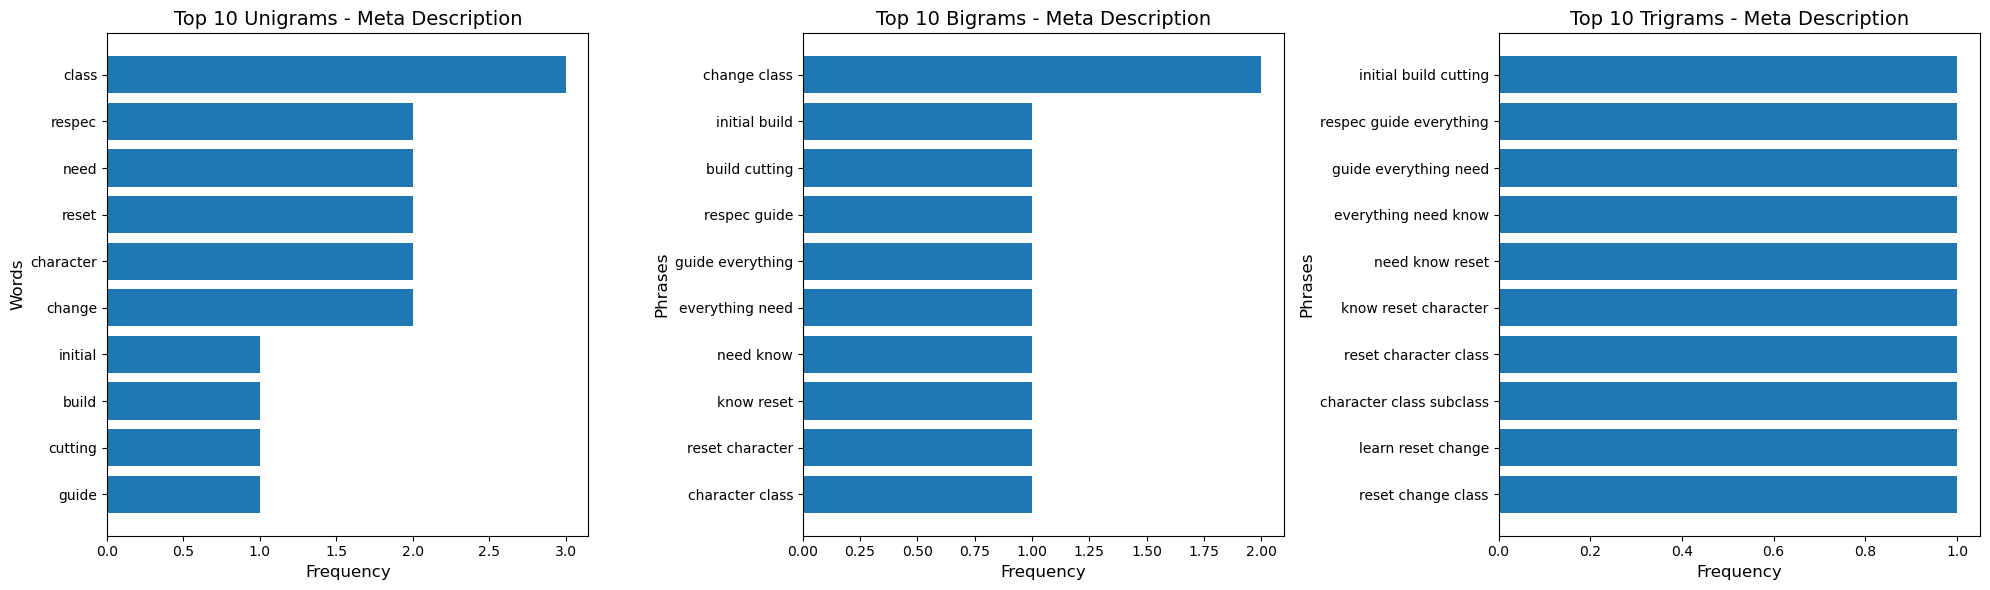

In [11]:
plot_question_ngrams(final_data, unique_questions[3])

## Question 5: How to get Minthara?

### The term "Minthara" dominates across all components, highlighting recruitment steps, quest progression, and player choices as the key focus areas.

Question:How to get Minthara?
Content:


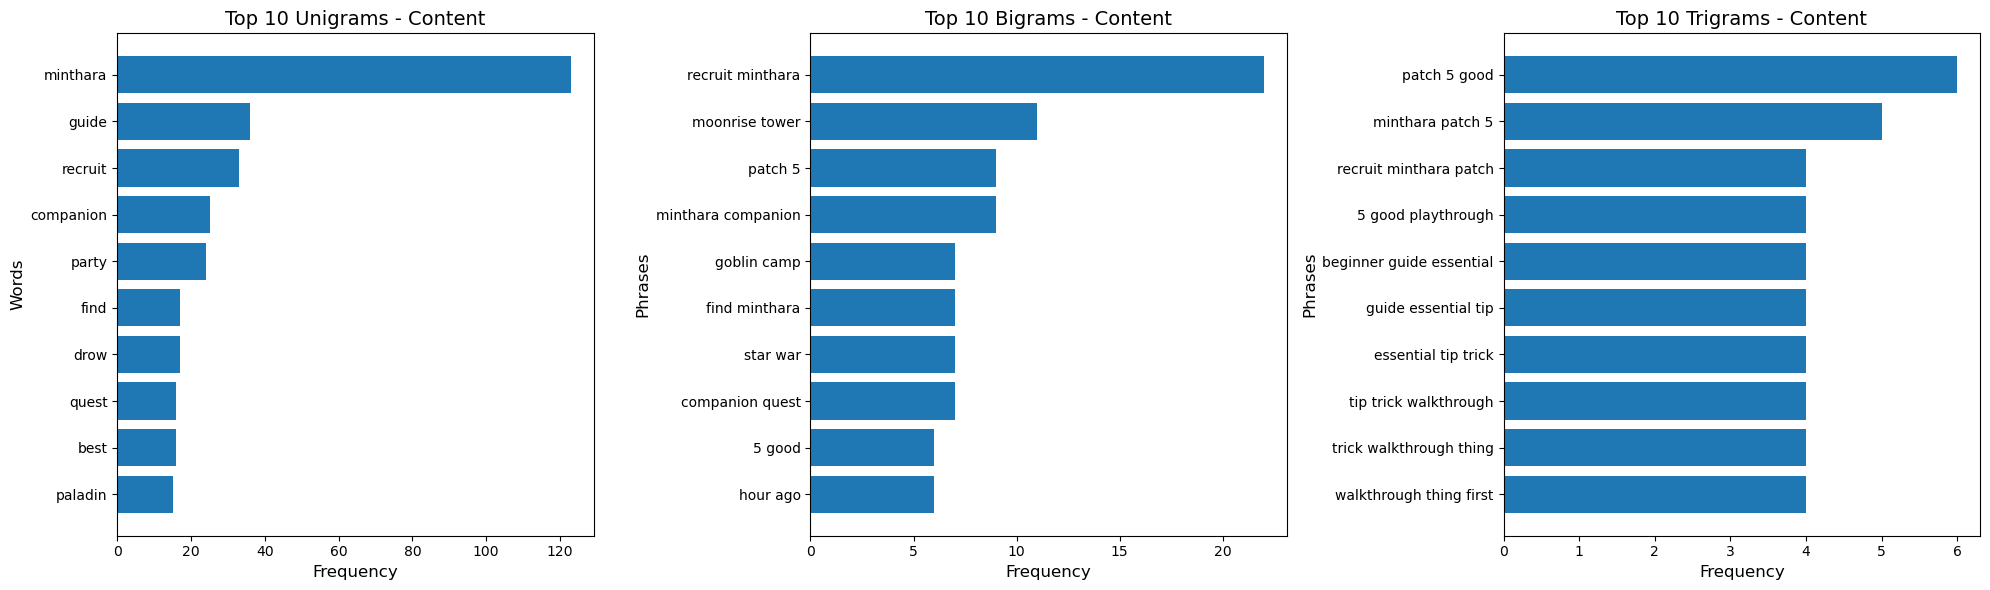

Meta Title:


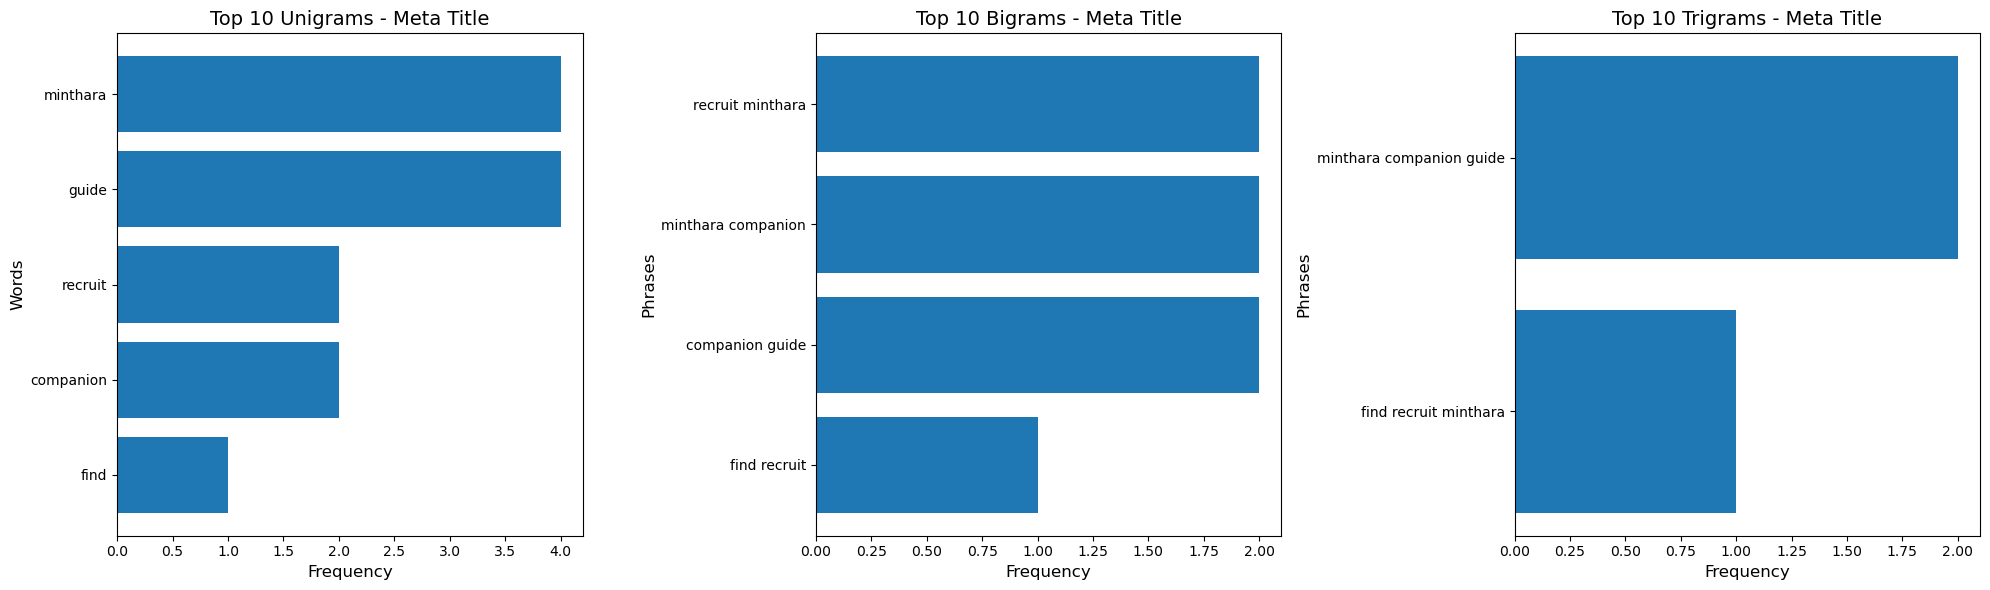

Meta Description:


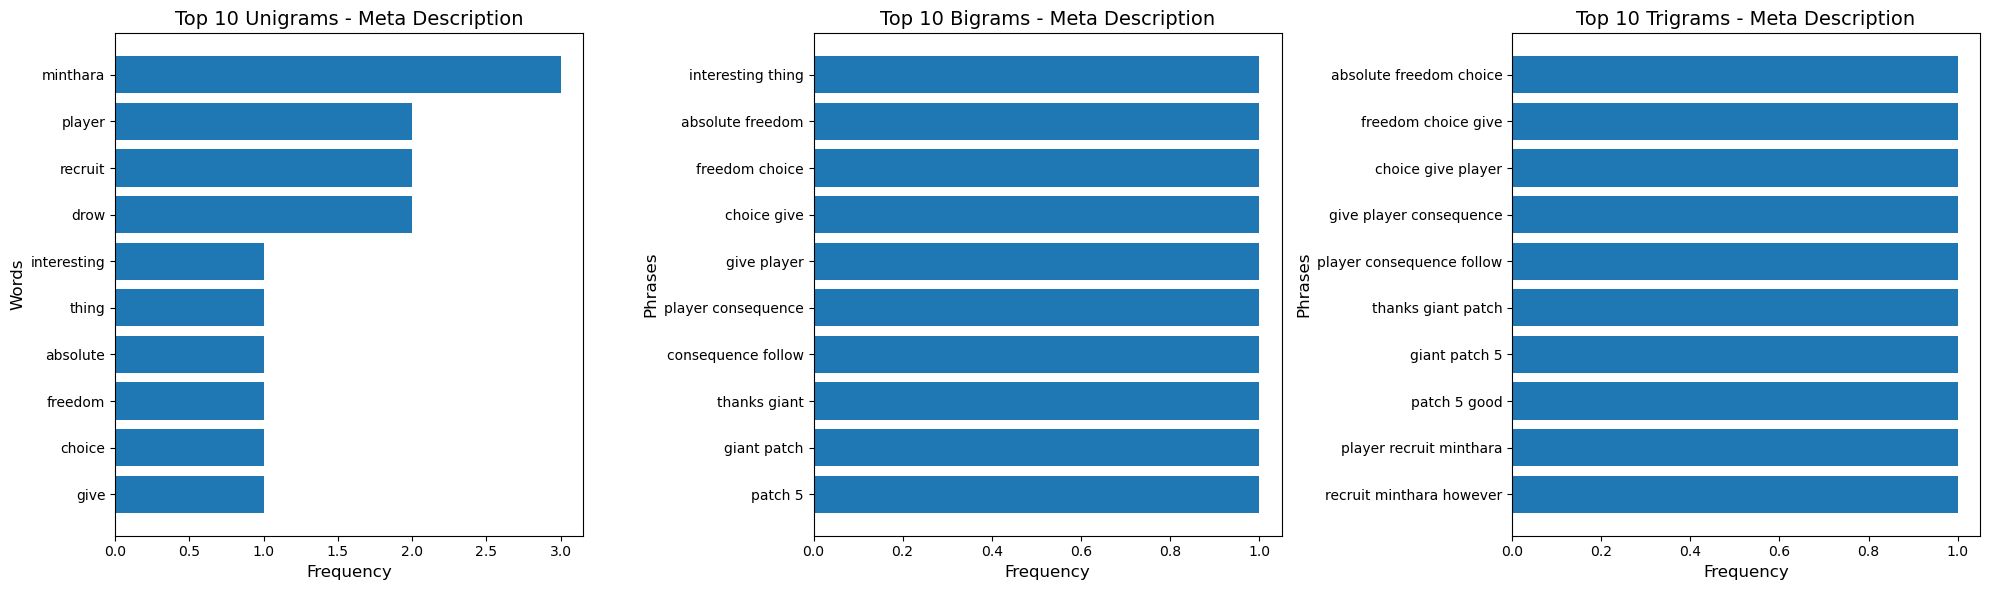

In [12]:
plot_question_ngrams(final_data, unique_questions[4])

## Question 6: How to get the Owlbear Cub?

### Content and metadata heavily focus on "owlbear" and "cub," with actionable phrases like "find owlbear cub" and "add owlbear companion" reinforcing search relevance.

Question:How to get the owlbear cub?
Content:


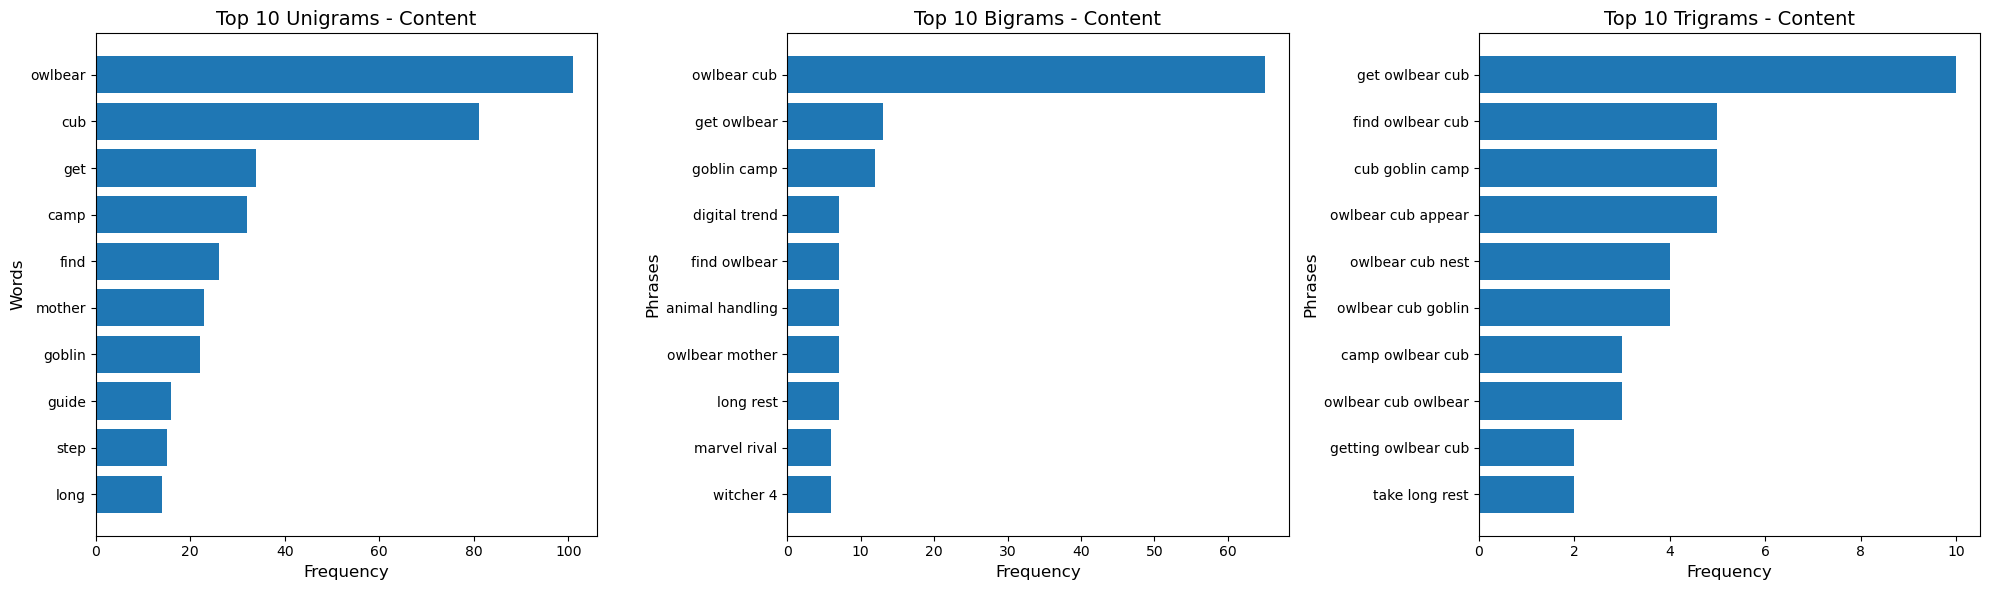

Meta Title:


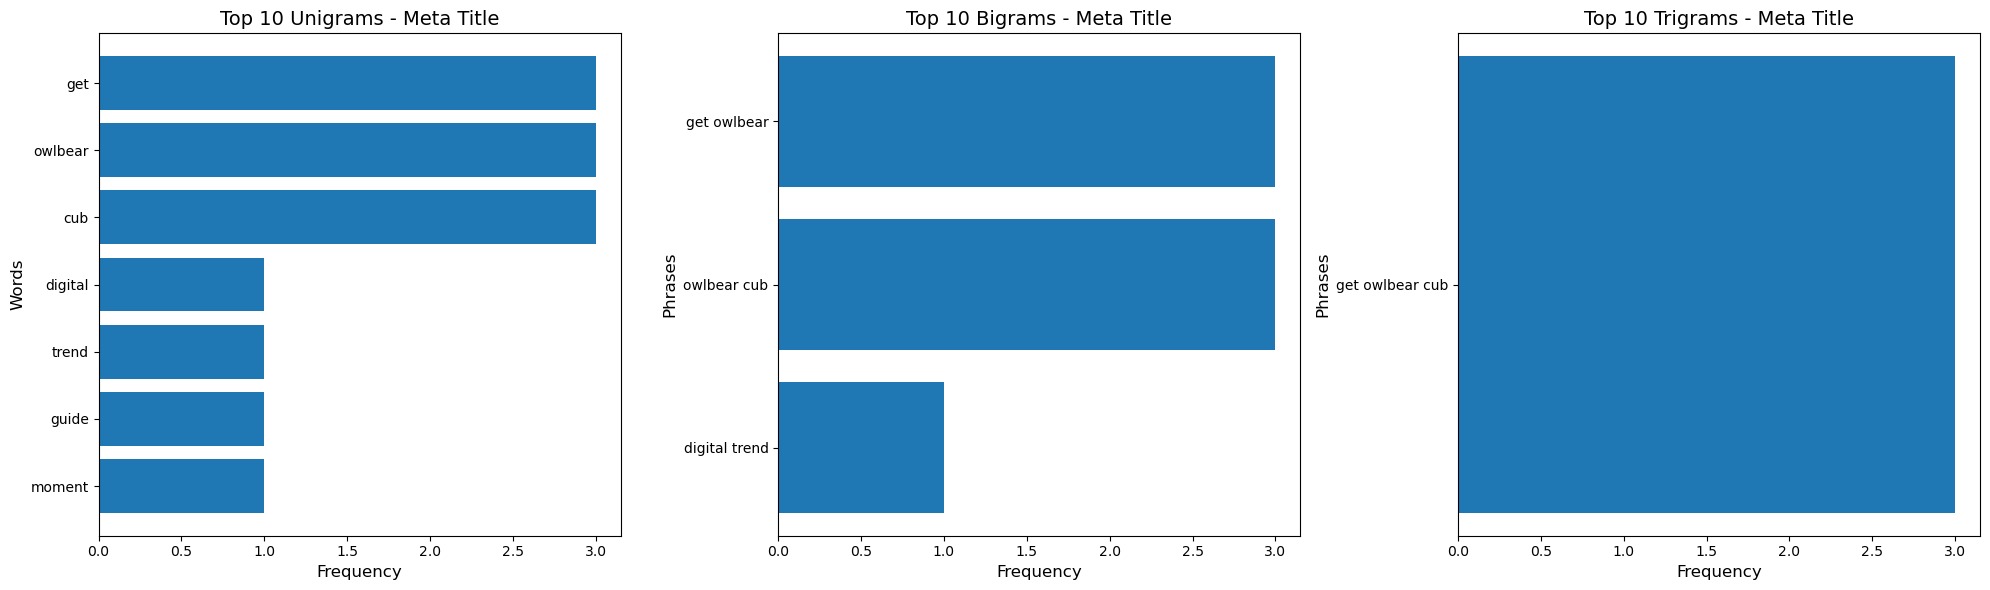

Meta Description:


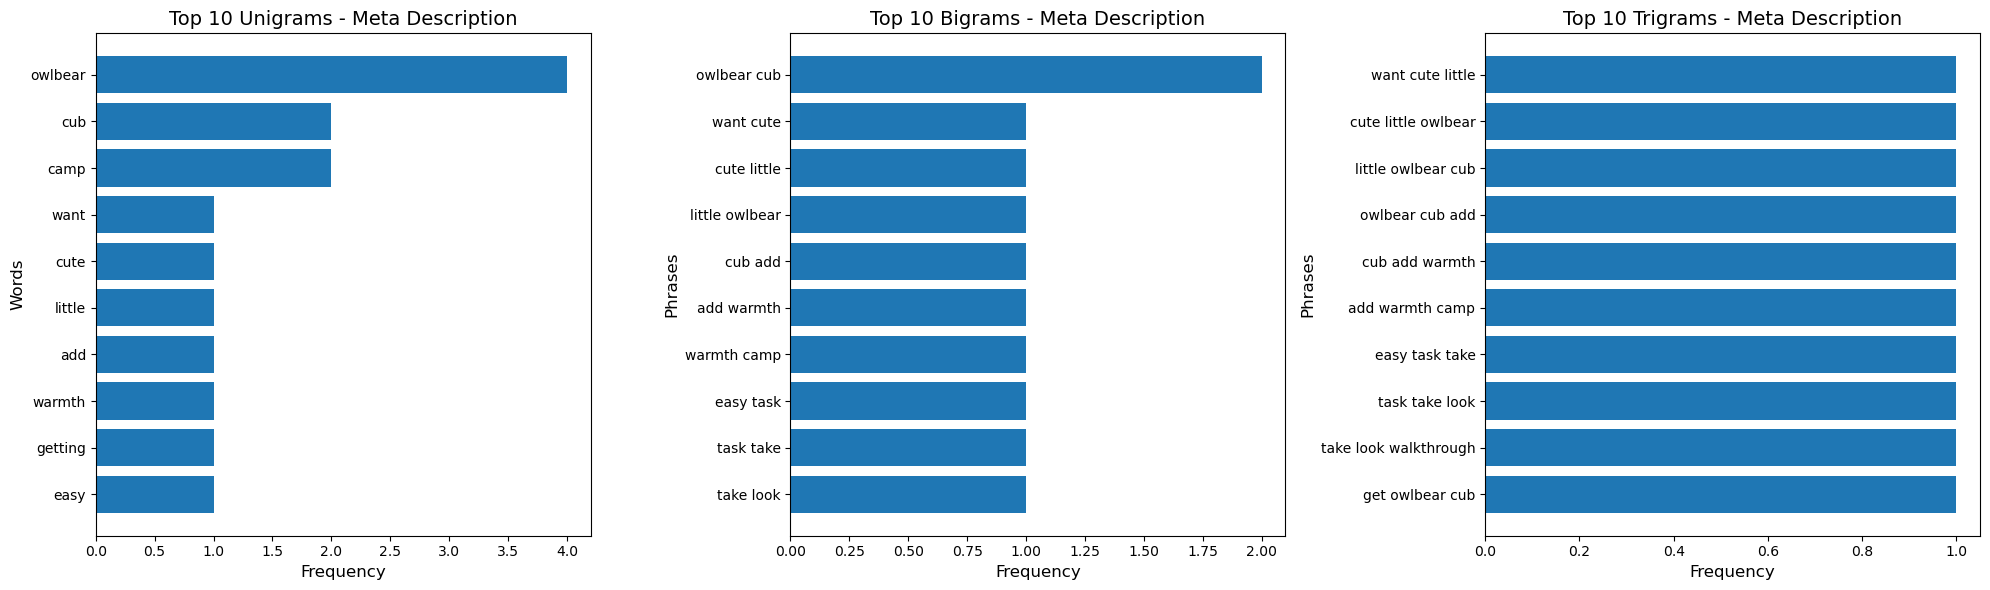

In [13]:
plot_question_ngrams(final_data, unique_questions[5])

## Question 7: How to Pickpocket?

### Terms like "pickpocket," "steal," and "sleight hand" dominate, indicating user interest in techniques and strategies for successfully pickpocketing in-game.

Question:How to pickpocket?
Content:


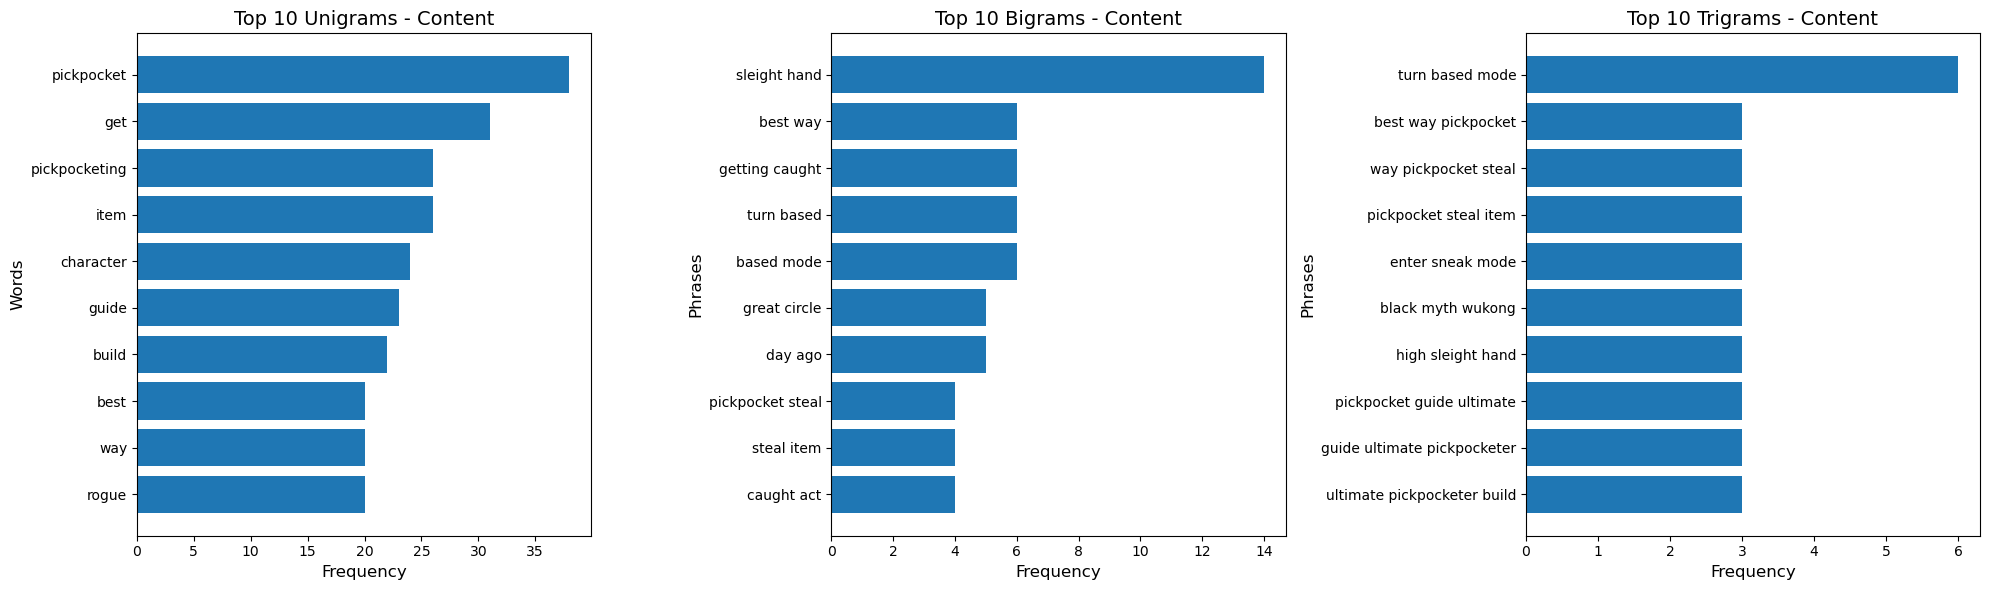

Meta Title:


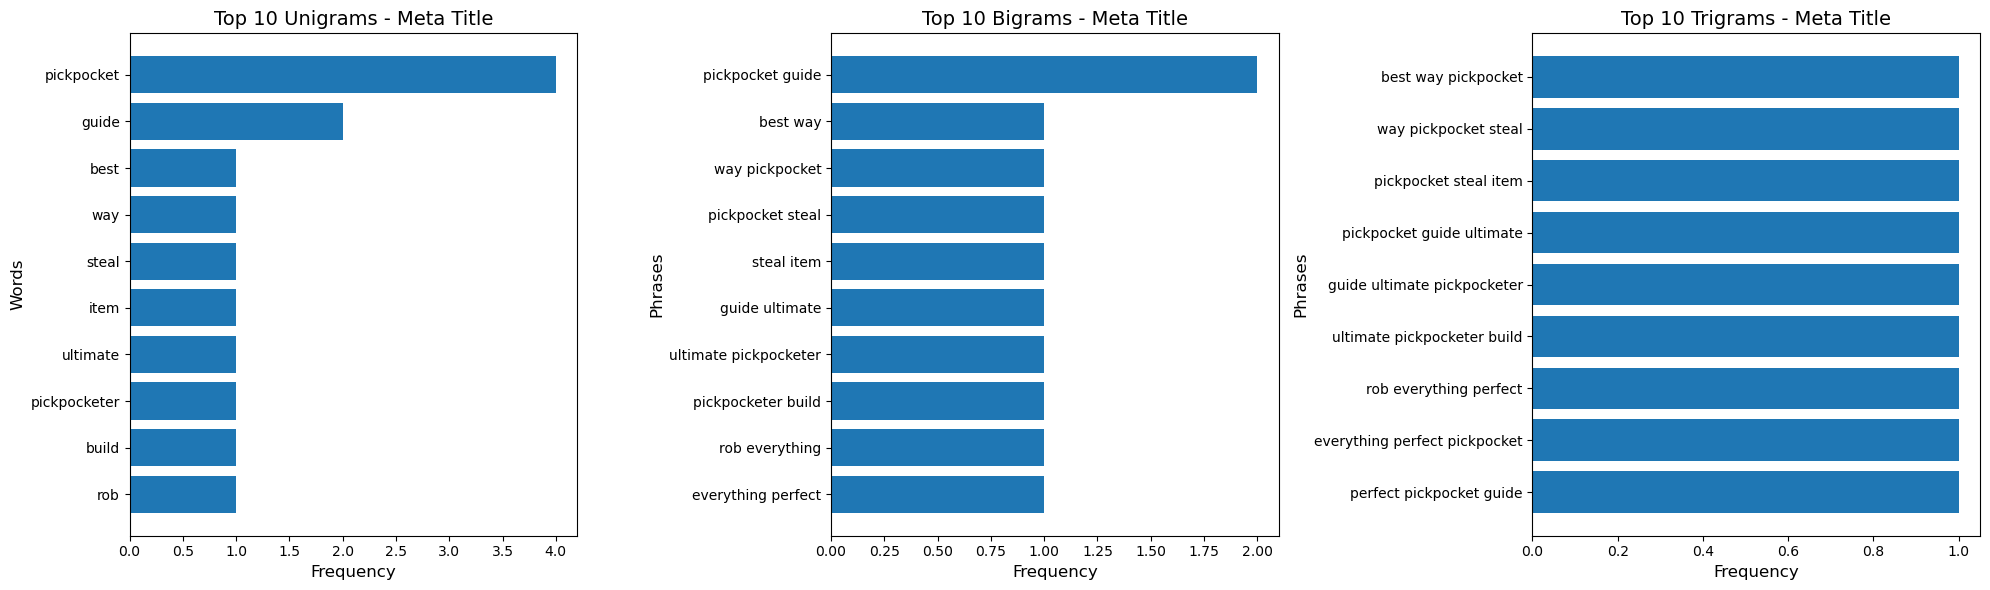

Meta Description:


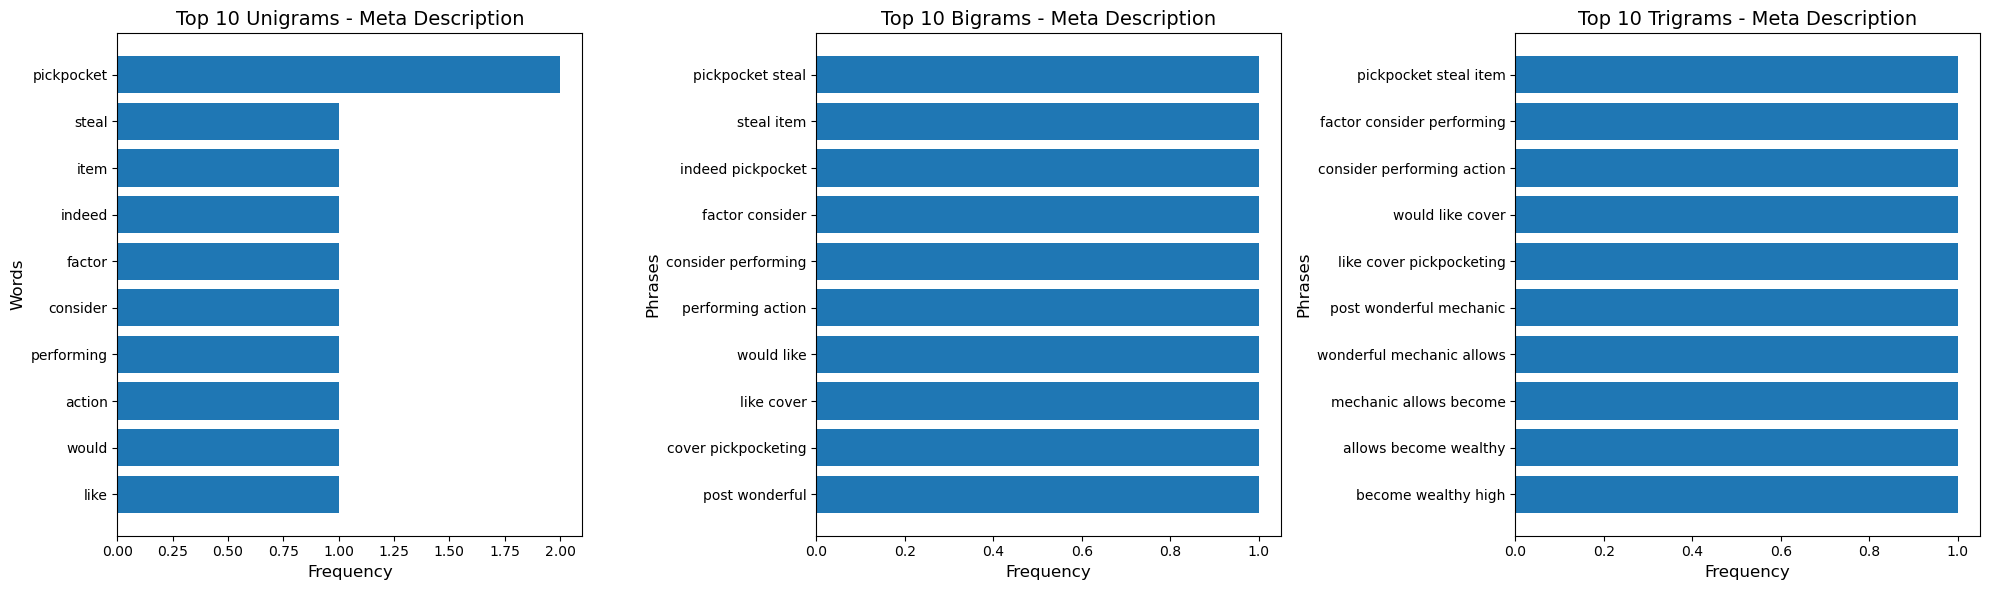

In [14]:
plot_question_ngrams(final_data, unique_questions[6])

## Question 8: How to Save Mayrina?

### Phrases like "save Mayrina," "Ethel," and "quest guide" reflect the query’s focus on step-by-step quest progression and choices.

Question:How to save Mayrina?
Content:


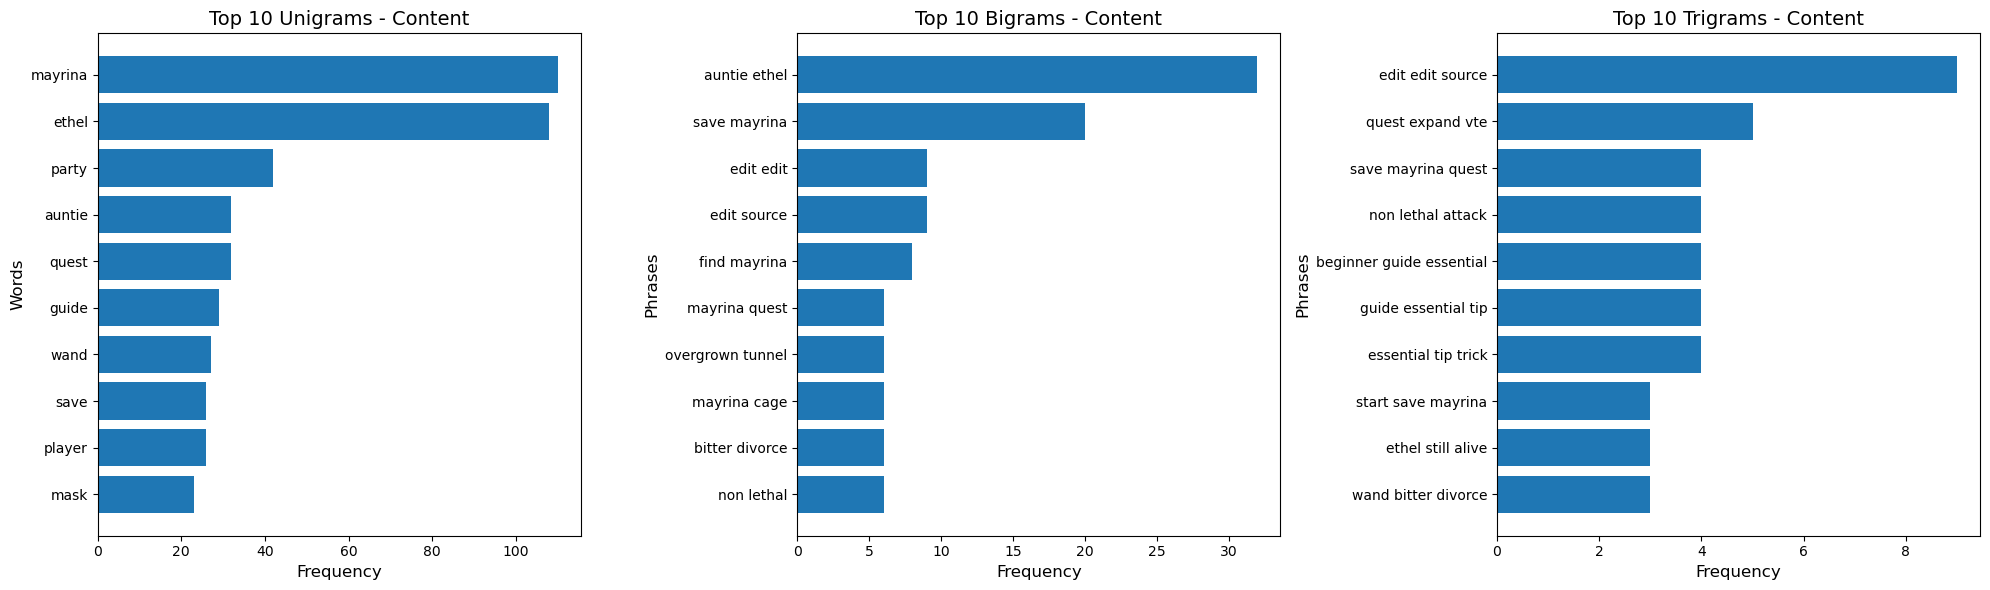

Meta Title:


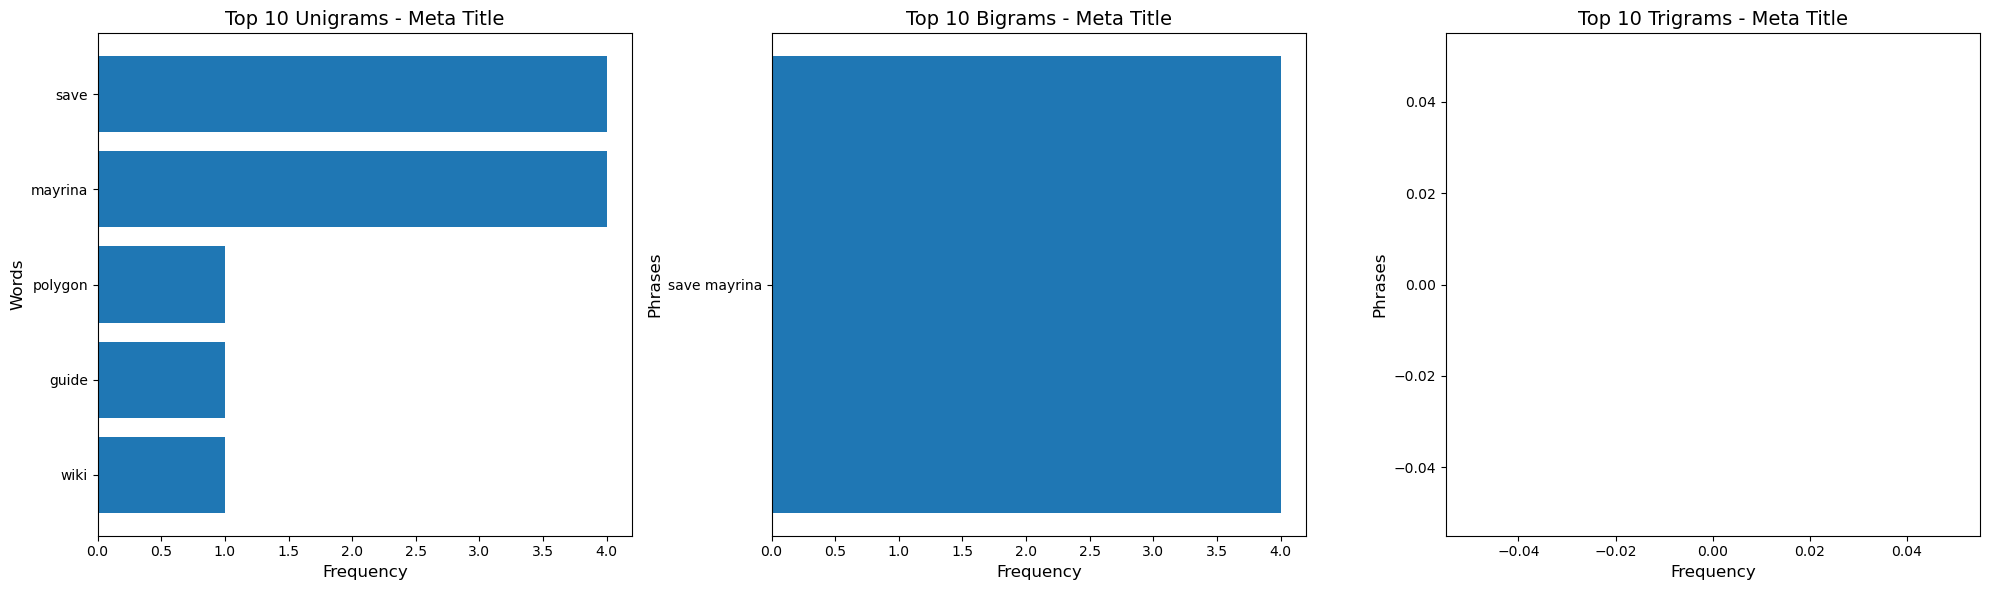

Meta Description:


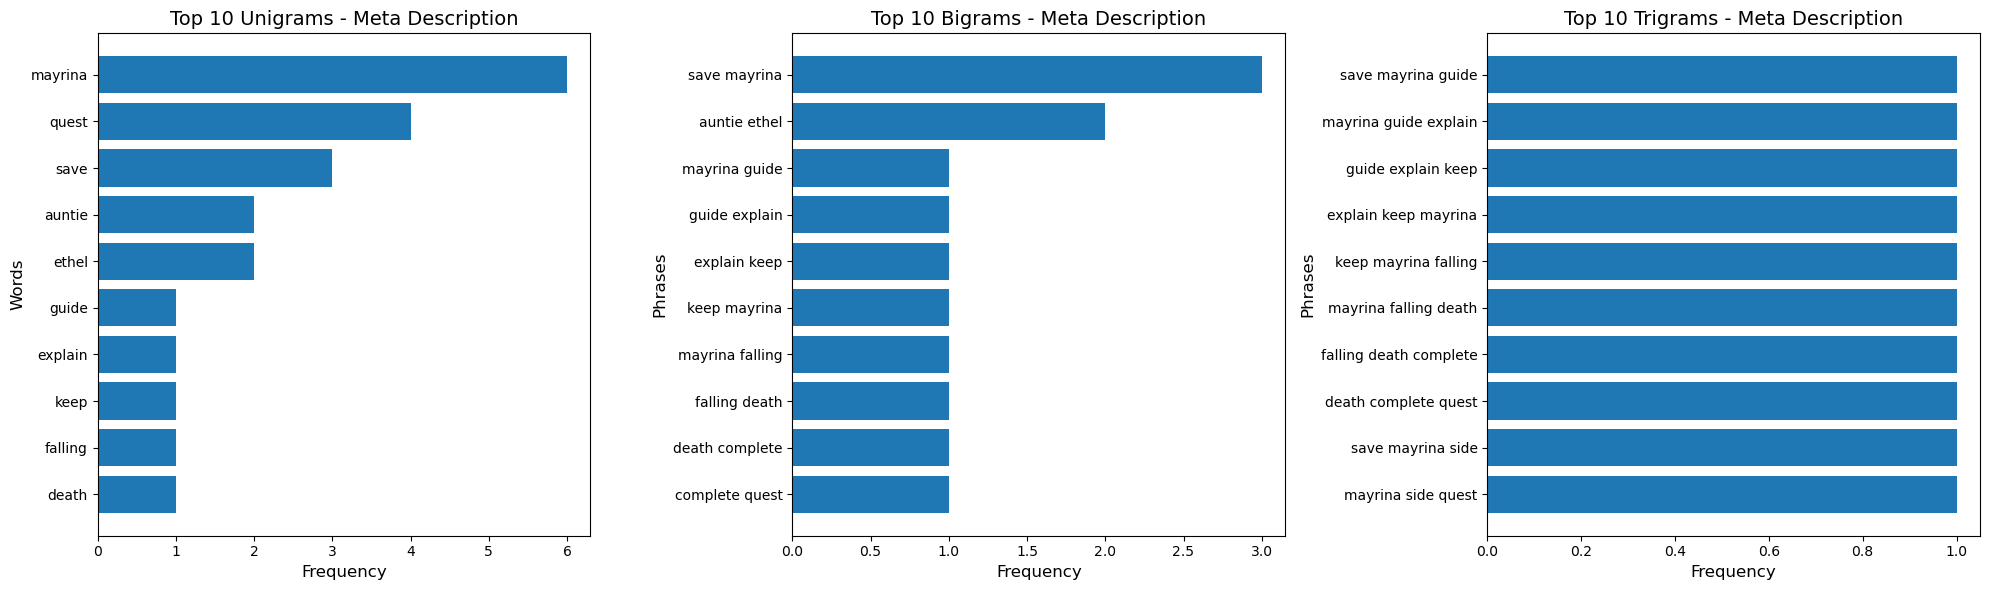

In [15]:
plot_question_ngrams(final_data, unique_questions[7])

## Question 9: How to Get All Companions?

### Key terms such as "recruit," "find," and "companion" dominate, with high-frequency bigrams like "find recruit" and "recruit companion guide" emphasizing recruitment strategies.

Question:How to get all companions?
Content:


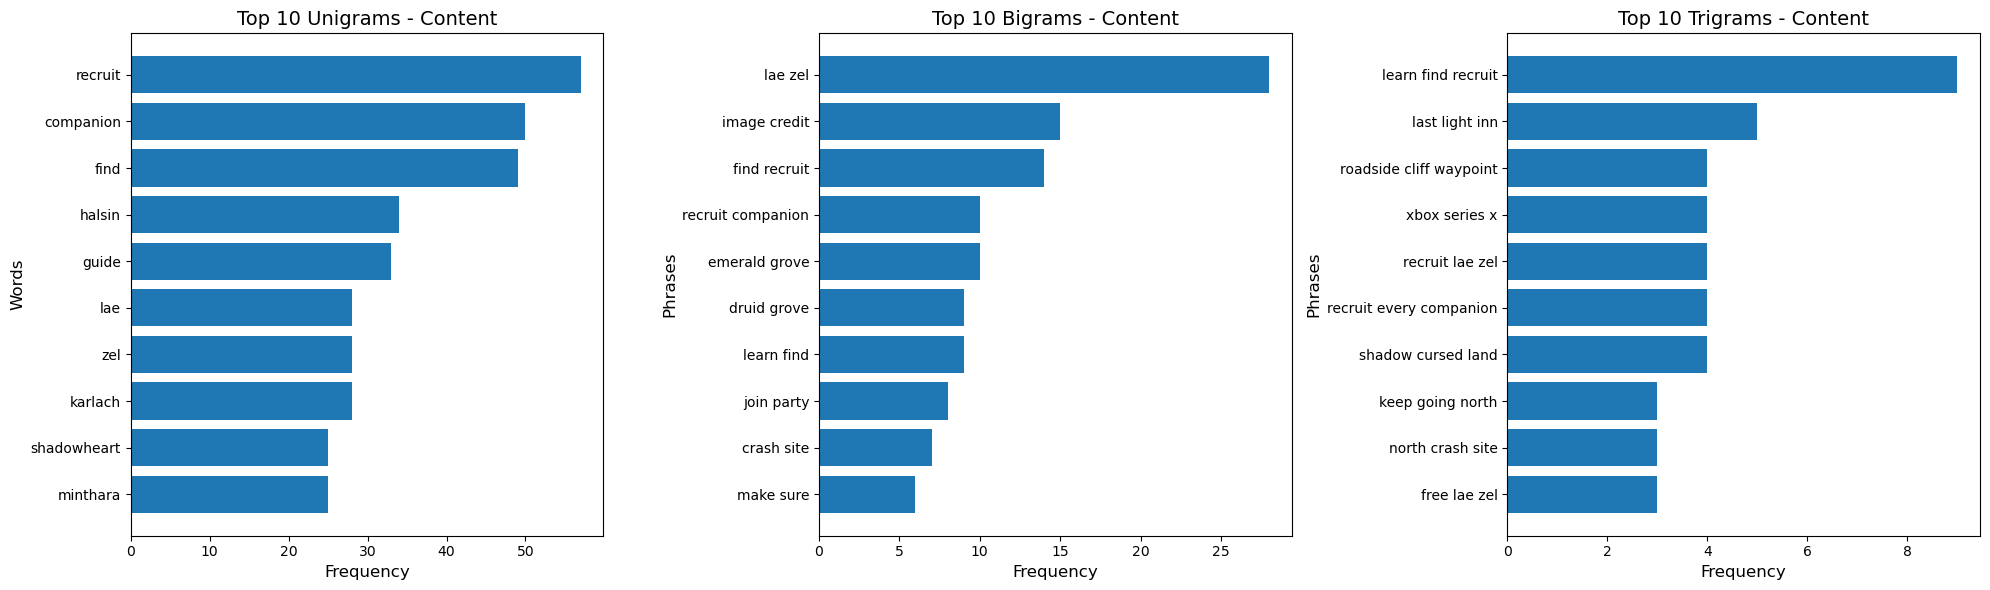

Meta Title:


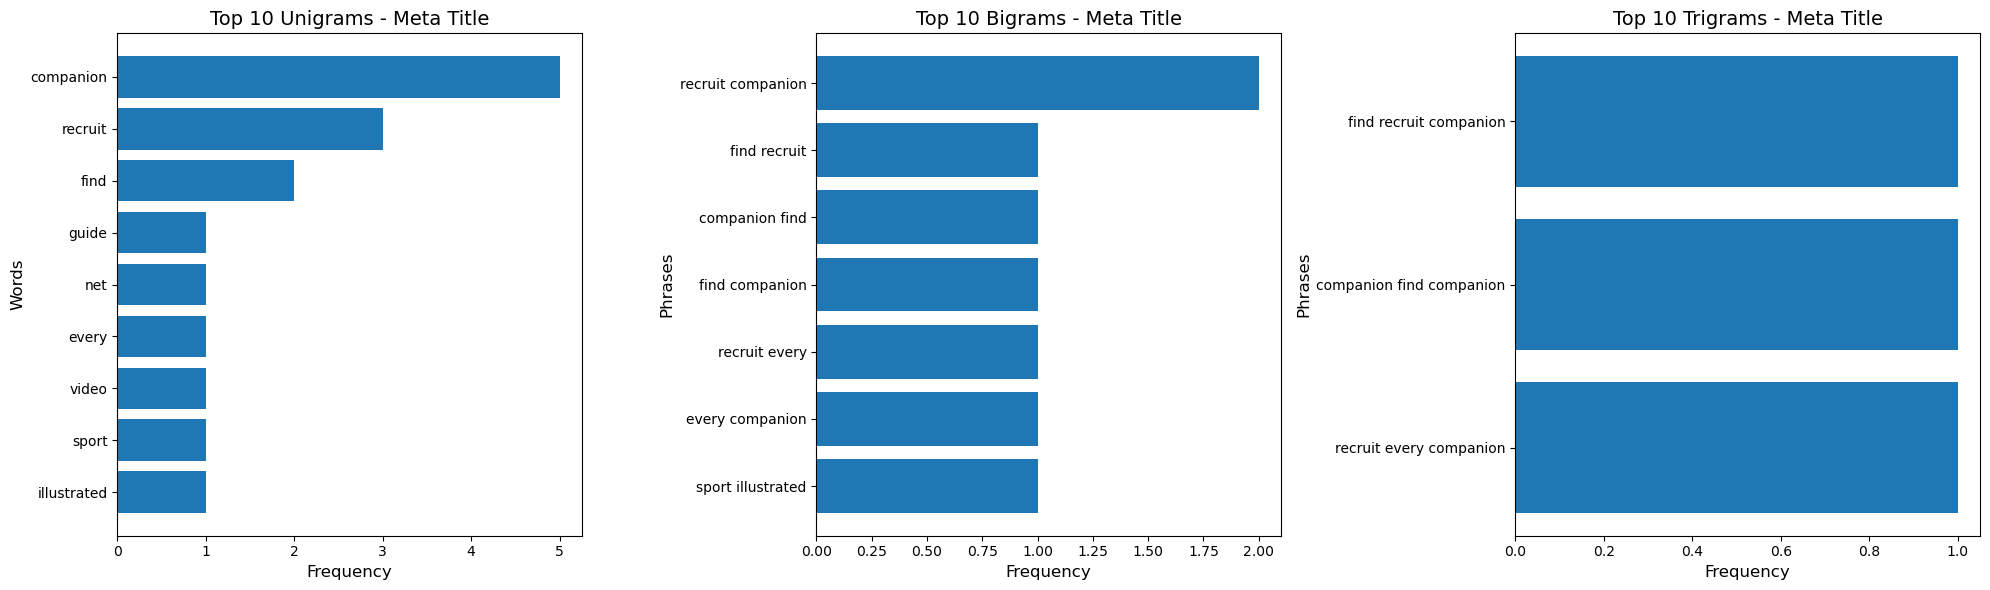

Meta Description:


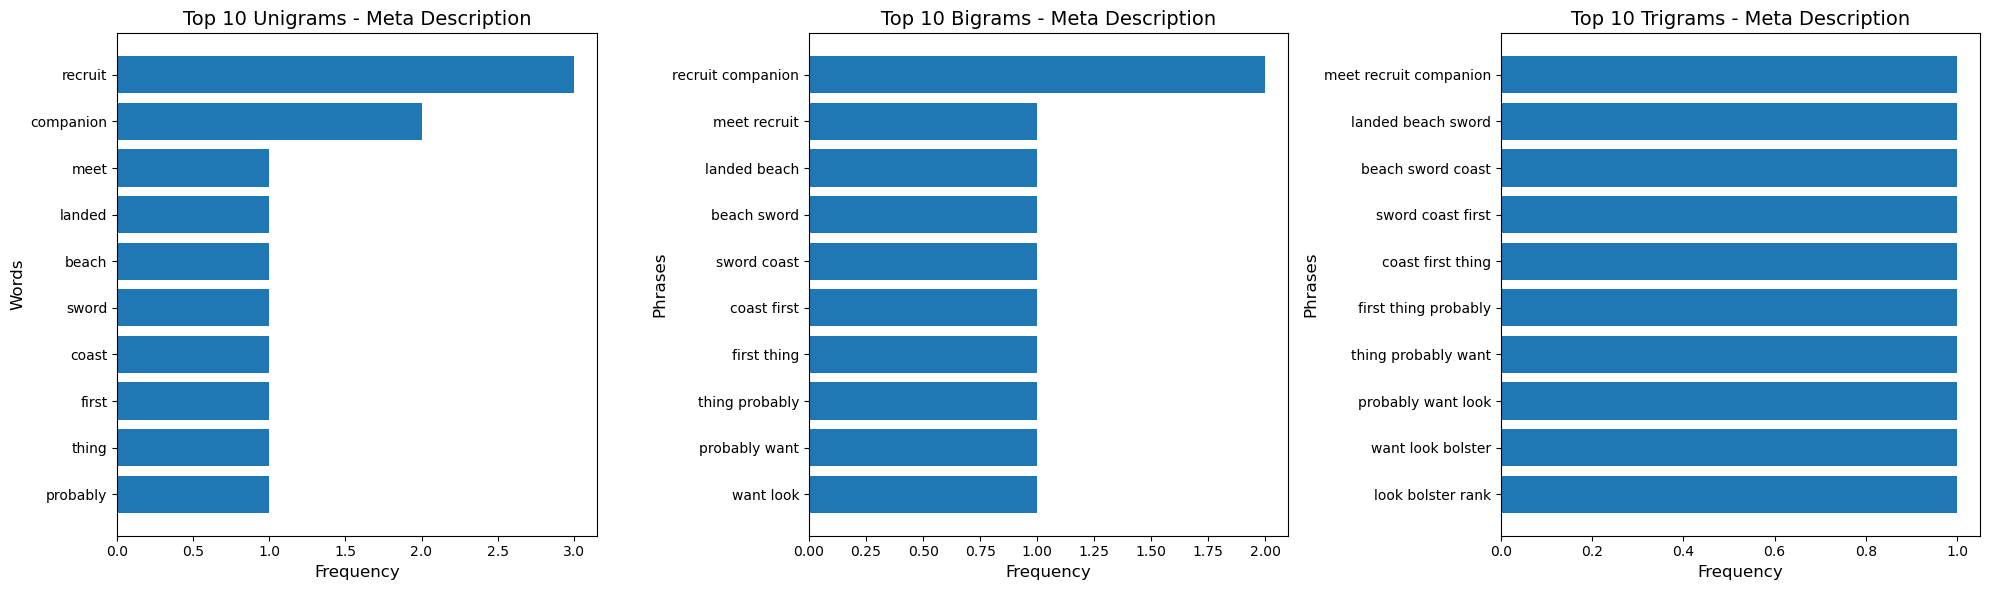

In [16]:
plot_question_ngrams(final_data, unique_questions[8])

## Step 5: SEO Recommendations
- Keyword Relevance: Across all questions, the content and meta data align well with user intent by focusing on actionable terms and phrases. Maintain this focus for future guides.
- Cross-Linking Opportunities: Including links to related topics (e.g., "Xbox Series X" or "Black Myth Wukong") within the content can improve engagement and SEO.
- Consistency in Metadata: Ensure meta titles and descriptions contain core keywords (e.g., "respec," "install mods," "save Mayrina") while staying concise and actionable.
- Content Structure: Optimize content with clear headings, step-by-step instructions, and keyword-rich phrases to better match user queries and improve visibility.